<a href="https://colab.research.google.com/github/20023173uhi/20023173_DataAnalytics/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment part One


**Introduction**

As part of the assignment exercise for the module *Data analytics on the web*, we were instructed to perform a case-study such that we should investigate the relationship between weather and traffic collisions on a particular day for New York City.
What follows is an account of the methods used and conclusions drawn in the process.  


New York State experiences a humid continental type of climate (according to the per Köppen climate classification [REF https://www.nature.com/articles/sdata2018214 )] and overall the State has warm and humid summers and cold and wet winters. Although the weather within New York City follows the state trend, it varies as a result of the urban heat island effect due to the large-scale urbanization. Any analysis involving the weather in the City requires city specific data and therefore the data used comes from the Meteorological Station New York Central Park (station ID 725060-94728, Latitude in decimal degrees: 40.779 Longitude in decimal degrees: -73.969) [REF https://geographic.org/global_weather/new_york/new_york_central_park_725060_94728.html  ] 


In reality, although as we know, corellation does not necessarily imply causality, such analysis of relationship between weather and traffic collisions could potentially be used to influence planning strategies for city planners [REF : Litzinger et.al. (2012) Using Weather Information to Improve Route Planning. *in*. *Bridging the Geographic Information Sciences*, J. Gensel et. al. Springer, Lecture Notes in Geoinformation and Cartography pg. 199-214 ]. Predictions of weather dependent fluctuations in demand upon the emergency and police services can assist in resource organisation. Furthermore, analysis of the geography of such collisions can be utilised for transport engineering and urban planning. In addition to directly weather related collisions, weather events can also reduce arterial mobility and reduce the effectiveness of traffic signal timing plans, which in turn can lead to driver frustration and potential increase in likelyhood of collision. 

The potential effects of weather upon the probabilty of collsions is also an area of interest to insurance companies, who may seek to shift blame in the event of a collision to the other drivers' lack of preparedness for the prevaling conditions. As the USA Department of Transportations Road Weather Management Program states that Weather-Related accidents compromise 21% of the total number of vehicle crashes in the USA each year.[REF. https://ops.fhwa.dot.gov/weather/q1_roadimpact.htm ] this is no trival subject.  



The data sets used in this excercise were - 


1.   The public Motor Vehicle Collisions in New York City provided by the New York Police Department (NYPD) from 2012 to the present. This data is derived through the police report (MV104-AN) which is required to be filled out for collisions where someone is injured or killed, or where there is at least $1000 worth of damage. As a result of this,any minor traffic collisions are not likely to appear. 
This public dataset is hosted in Google BigQuery.   
2.   The weather data from Meteorological Station New York Central Park as reported through NOAA. This information is likewise a public dataset hosted in Google BigQuery.  


The raw data required was initally collated into a .csv data table to allow a exploration of any potential relationship between weather and collisions.





**I NEED TO ADD SOMETHING ABOUT THE BIGDATA QUERY **


In [2]:
weather_collision1 <- read.csv ("https://raw.githubusercontent.com/20023173uhi/20023173_DataAnalytics/main/assignment1data.csv", stringsAsFactors = TRUE)

Following an initial visual check of the data file in Excel to check for any obvious data errors, the file was imported, and the following summary of the datafame offers an opportunity to see column names and associated data type, with the contents of the first six rows of data.      


In [3]:
head(weather_collision1)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,5,2020,1,24,2020-01-24,37.3,33.7,1028.5,6.5,3.3,8,999.9,46.0,19.9,0.00,999.9,1,523
2,1,2020,1,13,2020-01-13,42.5,37.0,1029.6,9.5,9.2,13,999.9,57.0,39.9,0.01,999.9,0,473
3,2,2020,1,7,2020-01-07,39.0,26.6,1016.6,10.0,8.0,13,999.9,43.0,24.1,0.00,999.9,0,402
4,3,2020,1,15,2020-01-15,43.9,38.3,1019.4,8.2,5.4,14,15.0,51.1,35.1,0.02,999.9,1,506
5,4,2020,1,30,2020-01-30,31.6,19.4,1023.4,10.0,9.4,15,999.9,37.0,21.9,0.00,999.9,0,522
6,1,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15,999.9,43.0,24.1,0.01,999.9,1,455


In [4]:
NROW(weather_collision1) #to count the number of rows in the dataset


[1] 3135

This dataset of 3135 rows contains 

*  Day - 1 to 7, Monday as 1 through to Sunday as 7
*  Year - from 2012 to 2020
*  Month - 1 to 12, January as 1 through to December as 12
*  Date of month for each row
*  Date of the collision - Year, Month and Day 
*  Mean Temperature - Fahrenheit
*  Dew point - a measure of the atmospheric moisture, it is  the temperature to which air must be cooled in order to reach saturation (assuming air pressure and moisture content are constant). A higher dew point indicates more moisture present in the air. It is sometimes referred to as Dew Point Temperature. Units Fahrenheit.
*   Sea level atmospheric pressure  
*   Visibilty - miles
*   Average wind speed - MPH
*   Maximum sustained wind speed - MPH
*   Gust speed - MPH
*   Max Temperature - Fahrenheit
*   Min Temperature - Fahrenheit
*   Precipitation - inches
*   Snow Depth - mm
*   Fog present - 1 if present, 0 if no fog
*   Total collisions reported for that date


**Checking dataset for anticipated number of records ** 

This value of 3135 indicates the length of the datset, but requires to be checked to ensure that this number matches the number of records expected given the date range of the dataset. 

The date column is first transformed to the *date* data type for ease of analysis throughout.  ( This is following good practice in fixing required data types directly after importing in this way [REF https://cran.r-project.org/web/packages/hablar/vignettes/convert.html ] )       
 

In [5]:
library(dplyr)
weather_collision1 <- weather_collision1 %>% mutate(collision_date = as.Date(collision_date)) #convert "fct" to "date"
weather_collision1


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
5,2020,1,24,2020-01-24,37.3,33.7,1028.5,6.5,3.3,8.0,999.9,46.0,19.9,0.00,999.9,1,523
1,2020,1,13,2020-01-13,42.5,37.0,1029.6,9.5,9.2,13.0,999.9,57.0,39.9,0.01,999.9,0,473
2,2020,1,7,2020-01-07,39.0,26.6,1016.6,10.0,8.0,13.0,999.9,43.0,24.1,0.00,999.9,0,402
3,2020,1,15,2020-01-15,43.9,38.3,1019.4,8.2,5.4,14.0,15.0,51.1,35.1,0.02,999.9,1,506
4,2020,1,30,2020-01-30,31.6,19.4,1023.4,10.0,9.4,15.0,999.9,37.0,21.9,0.00,999.9,0,522
1,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15.0,999.9,43.0,24.1,0.01,999.9,1,455
5,2020,1,3,2020-01-03,45.8,42.9,1010.3,7.0,10.3,15.0,999.9,46.9,33.1,0.00,999.9,1,452
7,2020,1,26,2020-01-26,44.3,40.7,1006.4,6.5,13.0,19.0,28.0,51.1,36.0,0.44,999.9,1,395
4,2020,1,2,2020-01-02,39.6,28.9,1011.8,10.0,13.0,19.0,26.0,46.0,33.1,0.01,999.9,0,410


To confirm the range of dates contained within the dataset, the first and last dates were obtained.

  

In [6]:
library(lubridate) # for working with dates in R
weather_collision1 %>% 
summarise(min = min(date(collision_date)), max = max(date(collision_date)) )


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




min,max
<date>,<date>
2012-07-01,2020-12-01


The first date in the dataset is 1st day of July 2012, and the final date is the 1st of December 2020. Assuming that there would be an individual report for each day of the year between these dates we would expect to only see 3075 rows - but with a 3135 row data set, we see an extra 60 rows. 

These were seen to be due to double recordings for certain dates, and these dates were identified for inspection. 


In [7]:
library(tidyverse)
install.packages('data.table') 
library(data.table)

double_dates <- setDT(weather_collision1)[,if(.N>1) .SD,by=collision_date] # to take a look at the dates that are repeated
double_dates # gives all the instances of dates recorded twice

extra_collisions <- (sum(double_dates$NUM_COLLISIONS)/2) #counting the resultant number of additional collisions
print("#The total additional collisions due to doubled date records = ")
extra_collisions



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following object is masked from ‘package:purrr’:

    transpose


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are maske

collision_date,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
2014-02-28,5,2014,2,28,18.1,-2.6,9999.9,9.8,11.4,22.0,28.9,24.8,8.6,99.99,999.9,0,655
2014-02-28,5,2014,2,28,20.3,0.3,1020.5,9.6,12.5,24.1,33.0,28.0,14.0,0.00,999.9,0,655
2014-03-11,2,2014,3,11,43.5,33.4,9999.9,8.0,5.0,9.9,15.0,55.4,33.8,0.00,999.9,0,510
2014-03-11,2,2014,3,11,41.3,34.1,1002.9,8.3,9.0,12.0,18.1,48.9,32.0,0.00,999.9,0,510
2014-03-01,6,2014,3,1,24.1,12.5,1029.1,10.0,5.2,11.1,999.9,35.1,12.0,0.00,999.9,0,497
2014-03-01,6,2014,3,1,19.8,8.7,9999.9,10.0,5.0,15.9,20.0,35.6,5.0,0.00,999.9,0,497
2014-03-17,1,2014,3,17,26.6,8.2,9999.9,10.0,6.8,11.1,14.0,30.2,21.2,0.00,999.9,0,519
2014-03-17,1,2014,3,17,28.5,12.1,1018.8,10.0,14.2,19.0,25.1,39.0,24.1,0.00,999.9,0,519
2014-03-04,2,2014,3,4,18.9,2.4,9999.9,10.0,6.2,11.1,999.9,30.2,8.6,0.00,999.9,0,532


[1] "#The total additional collisions due to doubled date records = "


[1] 33212

All of these repeated dates are in the first half of 2014. These 59 doubled recordings (118/2) represent a very small proportion of the overall dataset, which numbers over 3135 records. It is worth noting however, that these do add an additional 33212 collisions. 

Where values recorded for a given date are repeated, outside of those where one of the variable values is not the Null equivalent, the values of the variables are not identical, but not dissimilar, and it was felt that removing every instance of repeated entry for a given date would be the reasonable step to take.    

   

In [8]:
double_dates %>% dplyr:: filter(row_number () %% 2==0) # looking at the effects of reduction of the doubled date records by 1/2 

collision_date,day,year,mo,da,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<date>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
2014-02-28,5,2014,2,28,20.3,0.3,1020.5,9.6,12.5,24.1,33.0,28.0,14.0,0.00,999.9,0,655
2014-03-11,2,2014,3,11,41.3,34.1,1002.9,8.3,9.0,12.0,18.1,48.9,32.0,0.00,999.9,0,510
2014-03-01,6,2014,3,1,19.8,8.7,9999.9,10.0,5.0,15.9,20.0,35.6,5.0,0.00,999.9,0,497
2014-03-17,1,2014,3,17,28.5,12.1,1018.8,10.0,14.2,19.0,25.1,39.0,24.1,0.00,999.9,0,519
2014-03-04,2,2014,3,4,24.8,12.2,1025.5,10.0,8.3,12.0,999.9,30.0,21.0,0.00,999.9,0,532
2014-03-02,7,2014,3,2,35.1,28.8,1018.5,9.1,6.8,15.0,21.0,39.9,30.9,0.00,999.9,0,344
2014-03-05,3,2014,3,5,29.5,18.3,1024.3,9.5,7.1,21.0,26.0,36.0,25.0,0.00,999.9,0,491
2014-03-18,2,2014,3,18,27.7,14.7,1023.7,10.0,8.7,15.0,20.0,37.0,18.0,0.00,999.9,0,551
2014-03-19,3,2014,3,19,35.0,23.6,1025.6,10.0,9.7,15.0,20.0,42.1,28.9,0.00,999.9,0,525


In [9]:
weather_collision <- weather_collision1 %>% distinct(collision_date, `.keep_all` = TRUE) # removing repeated "date" rows 
weather_collision

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
5,2020,1,24,2020-01-24,37.3,33.7,1028.5,6.5,3.3,8.0,999.9,46.0,19.9,0.00,999.9,1,523
1,2020,1,13,2020-01-13,42.5,37.0,1029.6,9.5,9.2,13.0,999.9,57.0,39.9,0.01,999.9,0,473
2,2020,1,7,2020-01-07,39.0,26.6,1016.6,10.0,8.0,13.0,999.9,43.0,24.1,0.00,999.9,0,402
3,2020,1,15,2020-01-15,43.9,38.3,1019.4,8.2,5.4,14.0,15.0,51.1,35.1,0.02,999.9,1,506
4,2020,1,30,2020-01-30,31.6,19.4,1023.4,10.0,9.4,15.0,999.9,37.0,21.9,0.00,999.9,0,522
1,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15.0,999.9,43.0,24.1,0.01,999.9,1,455
5,2020,1,3,2020-01-03,45.8,42.9,1010.3,7.0,10.3,15.0,999.9,46.9,33.1,0.00,999.9,1,452
7,2020,1,26,2020-01-26,44.3,40.7,1006.4,6.5,13.0,19.0,28.0,51.1,36.0,0.44,999.9,1,395
4,2020,1,2,2020-01-02,39.6,28.9,1011.8,10.0,13.0,19.0,26.0,46.0,33.1,0.01,999.9,0,410


Removing one of each of the double date recordings brings the total number of rows to 3076. This is almost exactly the expected value of 3075, and we can be confident that the dataset has no such double entry errors and can move on to examine the data. 





**Producing a summary of the data** 
This allows examination of the range of data characteristics -  

In [10]:
head (weather_collision)

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
5,2020,1,24,2020-01-24,37.3,33.7,1028.5,6.5,3.3,8,999.9,46.0,19.9,0.00,999.9,1,523
1,2020,1,13,2020-01-13,42.5,37.0,1029.6,9.5,9.2,13,999.9,57.0,39.9,0.01,999.9,0,473
2,2020,1,7,2020-01-07,39.0,26.6,1016.6,10.0,8.0,13,999.9,43.0,24.1,0.00,999.9,0,402
3,2020,1,15,2020-01-15,43.9,38.3,1019.4,8.2,5.4,14,15.0,51.1,35.1,0.02,999.9,1,506
4,2020,1,30,2020-01-30,31.6,19.4,1023.4,10.0,9.4,15,999.9,37.0,21.9,0.00,999.9,0,522
1,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15,999.9,43.0,24.1,0.01,999.9,1,455


In [11]:
summary (weather_collision) # to allow initial examination 

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.647   Mean   :15.73  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
 collision_date            temp            dewp               slp       
 Min.   :2012-07-01   Min.   : 5.80   Min.   :   -6.70   Min.   :  989  
 1st Qu.:2014-08-08   1st Qu.:41.30   1st Qu.:   32.70   1st Qu.: 1012  
 Median :2016-09-15   Median :52.70   Median :   45.90   Median : 1017  
 Mean   :2016-09-15   Mean   :52.35   Mean   :   48.01   Mean   : 1116  
 3rd Qu.:2018-10-24   3rd Qu.:64.80   3rd Qu.:   59.20   3rd Qu.: 1022  
 Max.   :2020-12-01   Max.   :86.70   Max.   : 9999.90   Max.   :10000  
     visib             wdsp       

As shown above, there is a range of information that can be obtained by using a summary such as this. It should be noted that some of the summary information is meaningless, such as the mean of the values used to represent the day of the week, for example. For some of the variables, such as dew point and snow depth, the max values of 999.9 can be seen. These values - used to represent a NULL value, have a significant effect upon such summaries for these variables, and may require to be addressed during the analysis that follows.



**Null values in the dataset**

 To look for relationships beween some of the variables, a lattice plot is a good place to start - and does, as expected, show the effects of the recurring NULL value upon the data. It is clear that this value will require to be addressed throughout.    

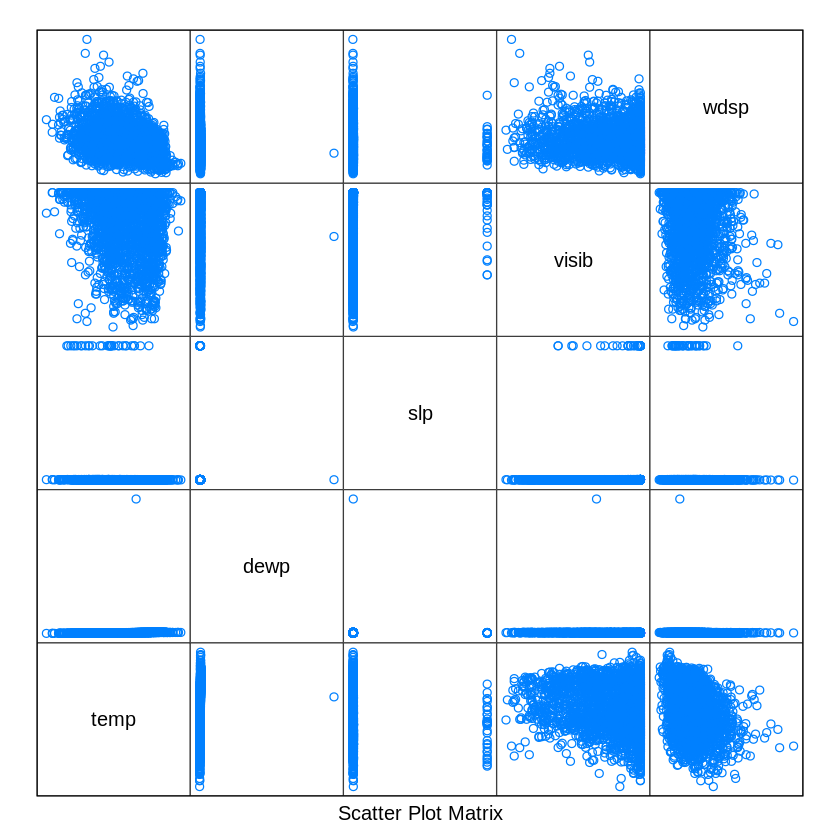

In [12]:
library(lattice)

splom(~ weather_collision[, c(6,7,8,9,10)], groups = NULL, data = weather_collision, axis.line.tck = 0, axis.text.alpha = 0)


NULL values in datasets are not a trival subject, and there is no one-fits-all approach to dealing with the problem. 
Deletion may introduce a bias into the estimation of the parameters unless the NULL parameters are randomly distributed. [REF Hyung Kang,(2013)* The prevention and handling of the missing data.* Korean Journal of Anesthesiology, 64(5)  pg 402-406 ] 

The effects of different methods of dealing with missing data has been widely researched and discussed elewhere [REF eg. Allan Donner (1981)*The Relative Effectiveness of Procedures Commonly Used in Multiple Regression Analysis for Dealing with Missing Values* The American Statistician 36(4) pg 378 - 381  and J.O. Curry (1977) The treatment of missing data in multivariate analysis Sociological Methods and Research 6 (2) and  A.C Acock (2005) *Working with missing values* Journal of Marriage and Family 67 pg 1012 - 1028 ]

Included in the published discussions is the method of dealing with NULL values using the method of "last observation carried forward". 
The effects of using this method are reduced in cases where the missing value is considered to be random. With the NULL values in this dataset indeed appearing randomly distributed, this was considered, but for some of the variables - especially gust and sndp, there were more NULL values than genuine data recordings, so this was not suitable. 

It was decided that replacing each of the 9999,9, 999.9 or 99.9 values that have been used represent NULL with NA. This replacement applies only to the variables dewp, mxpsd, gust, prcp and sndp.


 



In [13]:
head(weather_collision)


weather_collision$dewp   [weather_collision$dewp == 9999.90 ] <- NA
weather_collision$mxpsd  [weather_collision$mxpsd == 999.90] <- NA
weather_collision$gust   [weather_collision$gust == 999.90 ] <- NA
weather_collision$sndp   [weather_collision$sndp == 999.90 ] <- NA
weather_collision$prcp   [weather_collision$prcp == 99.990 ] <- NA
weather_collision$slp    [weather_collision$slp == 9999.9] <- NA

summary(weather_collision) 

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
5,2020,1,24,2020-01-24,37.3,33.7,1028.5,6.5,3.3,8,999.9,46.0,19.9,0.00,999.9,1,523
1,2020,1,13,2020-01-13,42.5,37.0,1029.6,9.5,9.2,13,999.9,57.0,39.9,0.01,999.9,0,473
2,2020,1,7,2020-01-07,39.0,26.6,1016.6,10.0,8.0,13,999.9,43.0,24.1,0.00,999.9,0,402
3,2020,1,15,2020-01-15,43.9,38.3,1019.4,8.2,5.4,14,15.0,51.1,35.1,0.02,999.9,1,506
4,2020,1,30,2020-01-30,31.6,19.4,1023.4,10.0,9.4,15,999.9,37.0,21.9,0.00,999.9,0,522
1,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15,999.9,43.0,24.1,0.01,999.9,1,455


      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.647   Mean   :15.73  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
                                                                
 collision_date            temp            dewp            slp      
 Min.   :2012-07-01   Min.   : 5.80   Min.   :-6.70   Min.   : 989  
 1st Qu.:2014-08-08   1st Qu.:41.30   1st Qu.:32.70   1st Qu.:1012  
 Median :2016-09-15   Median :52.70   Median :45.90   Median :1017  
 Mean   :2016-09-15   Mean   :52.35   Mean   :44.77   Mean   :1017  
 3rd Qu.:2018-10-24   3rd Qu.:64.80   3rd Qu.:59.20   3rd Qu.:1022  
 Max.   :2020-12-01   Max.   :86.70   Max.   :74.10   Max.   :1044

**The snow variable in the dataset**

A summary of the data set shows the effects of this removal of the NULL values with NA. In particular, it shows the very limited amount of snow recorded.
"sndp" column now holds 3075 NAs. As the column only contains 3076 values, this shows that snow was only recorded for one date, to a depth of 3.9 mm, throughout the entire dataset. 
There can be very little value attached to the snow variable, but out of interest to see if that one day of snow had a dramatic effect upon the numbers of collisions recorded in that one day, the number of collisions on that one day were retrived from the data set.               

In [15]:
which(weather_collision$sndp != '999.9') #looking for "not-null"
weather_collision [which(weather_collision$sndp != '999.9')] # returns 2815

which(weather_collision$sndp == '3.9')  # double-check - also returns 2815
weather_collision [which (weather_collision$sndp == '3.9')] #same single date return


[1] 2815

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
5,2012,11,9,2012-11-09,43.3,25.8,1016.1,9.8,9.6,30.9,43.9,53.1,36,0.17,3.9,0,688


[1] 2815

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
5,2012,11,9,2012-11-09,43.3,25.8,1016.1,9.8,9.6,30.9,43.9,53.1,36,0.17,3.9,0,688


The total collisions reported on the one day of snow (9th November 2012) did produce a higher than mean number of collisions.
The mean daily collisions shown in the summary above are 564, but on this one day of snow, there were 688 recorded. Unfortunately for the drivers in New York that day, they were caught in the snow storm known as *The November 2012 nor'easter *[REF https://en.wikipedia.org/wiki/November_2012_nor%27easter accessed 29/12/20] which led to widespread distuption in New York City, cancellations of flight and rail services, and evacuation of low lying areas. Although snow apparently led to an increase in collisions on this day, it also appears traffic flow on that day was unlikely to have been following the normal pattern, and without enough data in the dataset to corroborate the relationship between snow and collisions, it is not possible to draw conclusions. 

This does not imply that snow will not be disscussed further, and in fact forms part of an important point of discussion at a later point in this excercise.   


In [16]:
weather_collision <- subset(weather_collision, select = -sndp) # removing snowfall from dataset
head(weather_collision)

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
5,2020,1,24,2020-01-24,37.3,33.7,1028.5,6.5,3.3,8,NA,46.0,19.9,0.00,1,523
1,2020,1,13,2020-01-13,42.5,37.0,1029.6,9.5,9.2,13,NA,57.0,39.9,0.01,0,473
2,2020,1,7,2020-01-07,39.0,26.6,1016.6,10.0,8.0,13,NA,43.0,24.1,0.00,0,402
3,2020,1,15,2020-01-15,43.9,38.3,1019.4,8.2,5.4,14,15,51.1,35.1,0.02,1,506
4,2020,1,30,2020-01-30,31.6,19.4,1023.4,10.0,9.4,15,NA,37.0,21.9,0.00,0,522
1,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15,NA,43.0,24.1,0.01,1,455


Before moving to looking at specific days of the week, there is value attached to plotting the number of collisions by month. This will help establish any pattern in the number of collisions throughout the course of a year, and to assertain any connected to the seasonalilty of the weather in New York City.

If a seasonal variation is clearly visible, this could potentially point to a correllation between collisions and seasonal weather variations. If this is to be seen, that would lead to the possiblity of incorporating season into a prediction for any given day of the week.
     
 

**Investigating the possibilty of seasonality in collisions** 

Although the ulimate aim of this analysis is to focus upon the daily pattern of collisions, there is potentional value in looking for seasonality in the numbers of collisions reported. The dataset can be used to look for seasonal patterns in the weather in New York City, through the variables recorded. An increased understanding of the weather patterns of the city of New York will only be an advantage when attempting to investigate potential relationships between that weather and collisions with daily temporal granulatity.  



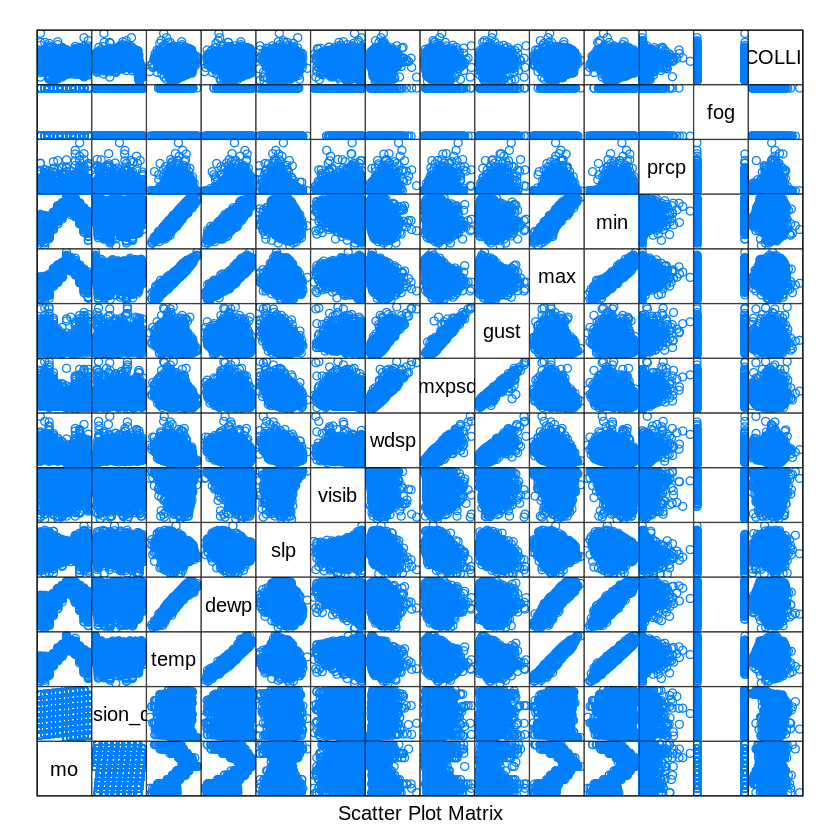

In [17]:
splom(~ weather_collision[, c(3, 5,6,7,8,9,10,11,12,13,14,15,16,17)], groups = NULL, data = weather_collision, axis.line.tck = 0, axis.text.alpha = 0)


Even at this scale, some of the most logical of the expected relationships can be visualised.
For example, the curve of relationship between Month and temperature can be seen. As the two temperature variables follow the same pattern of increase and decrease, and the data does not tell us at what time of day these minimum and maximum temperatures occured, it would be a reasonable step to use the average value of the temperature for each day.


In [18]:
weather_collision$temp_mean <- (weather_collision$min + weather_collision$max) /2 # average daily temperature
head(weather_collision)

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,temp_mean
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
5,2020,1,24,2020-01-24,37.3,33.7,1028.5,6.5,3.3,8,NA,46.0,19.9,0.00,1,523,32.95
1,2020,1,13,2020-01-13,42.5,37.0,1029.6,9.5,9.2,13,NA,57.0,39.9,0.01,0,473,48.45
2,2020,1,7,2020-01-07,39.0,26.6,1016.6,10.0,8.0,13,NA,43.0,24.1,0.00,0,402,33.55
3,2020,1,15,2020-01-15,43.9,38.3,1019.4,8.2,5.4,14,15,51.1,35.1,0.02,1,506,43.10
4,2020,1,30,2020-01-30,31.6,19.4,1023.4,10.0,9.4,15,NA,37.0,21.9,0.00,0,522,29.45
1,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15,NA,43.0,24.1,0.01,1,455,33.55


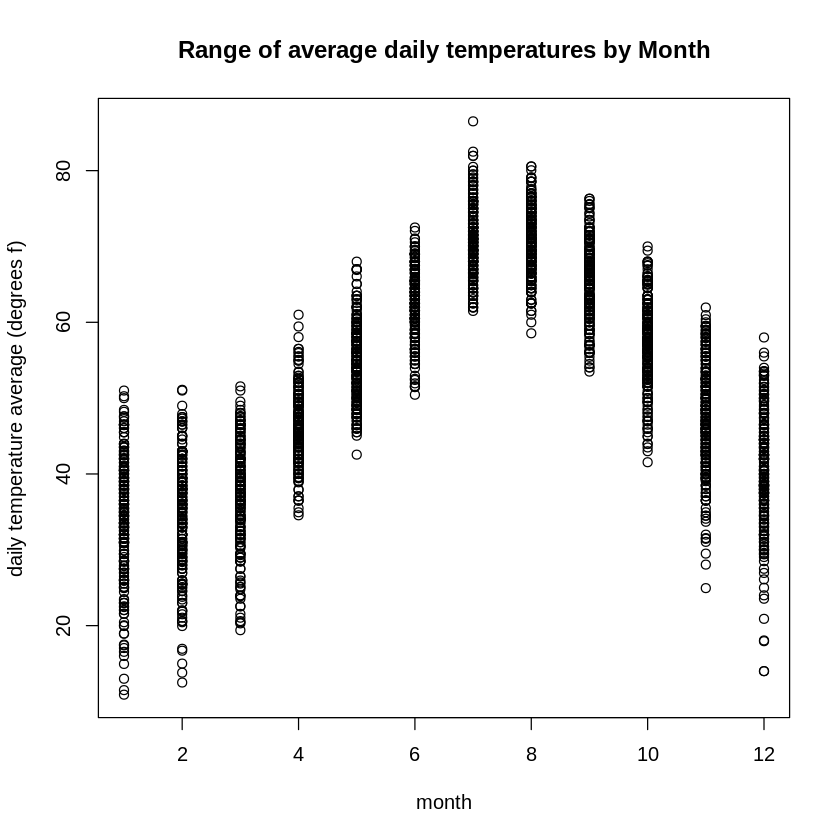

In [19]:
plot(weather_collision$mo, weather_collision$temp_mean, main = "Range of average daily temperatures by Month", xlab = "month", ylab = "daily temperature average (degrees f)")

This plot clearly demonstrates the seasonal pattern of New York City's temperature. The problems this extreme temporal weather pattern bring to the inhabitants are a downside to life in the city [REF *New Yorkers are leaving the city* *Forbes* Sept 5 1990; https://www.weather-us.com/en/new-york-usa/new-york-climate accessed 29/12/20 ]    
Temperature will be examined further, but plotting here helps understand the seasonal nature of New York City's cimate.  

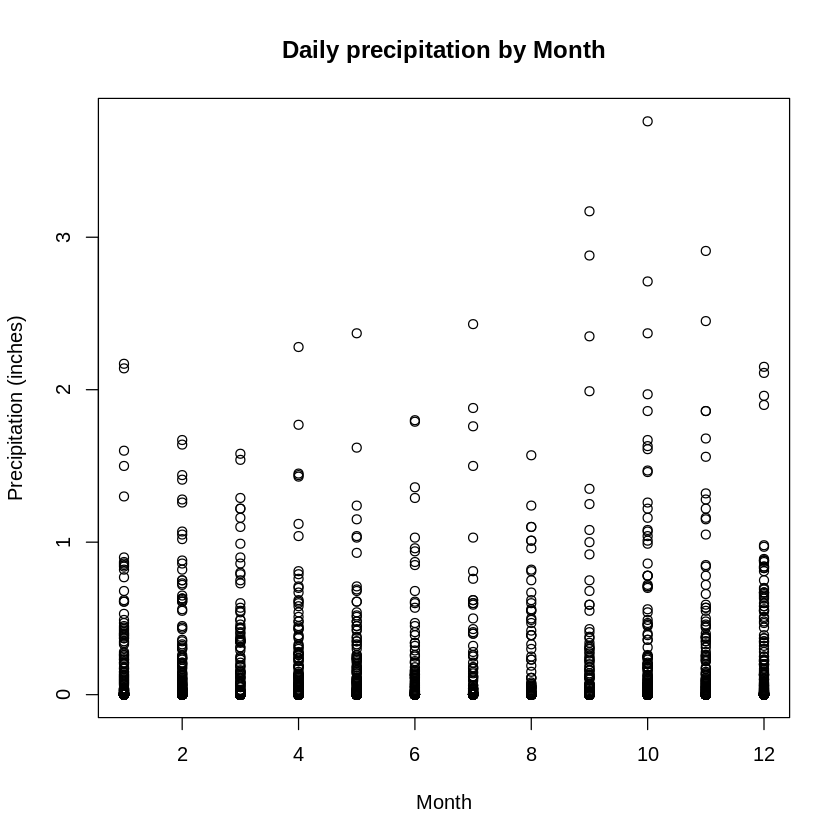

In [20]:
plot( weather_collision$mo, weather_collision$prcp, main = "Daily precipitation by Month", xlab = "Month", ylab = "Precipitation (inches)" ) 

The same seasonal pattern is not so evident in the rainfall recorded in the dataset. This pattern is as to be expected [REF *Weather Spark *https://weatherspark.com/y/23912/Average-Weather-in-New-York-City-New-York-United-States-Year-Round accessed 29/12/20]   
.    

As well as the rainfall, we can look at the seasonality of fog and visiblity, to see if there is a strong seasonal variation in these that we might like to incorporate into an predictive model at a daily level.
   

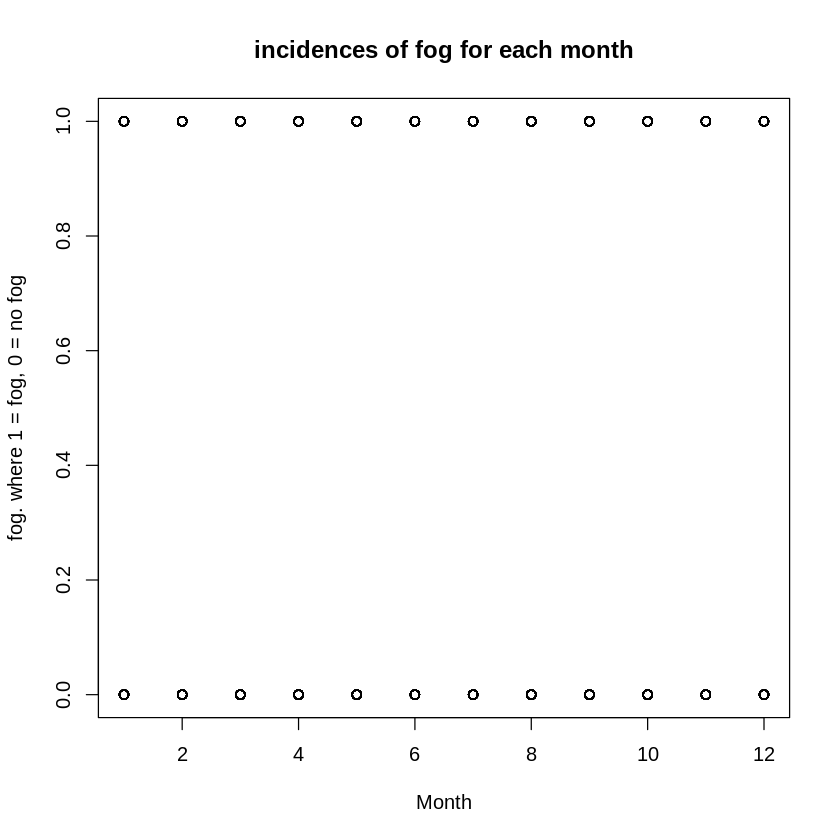

In [21]:
plot(weather_collision$mo, weather_collision$fog, main = "incidences of fog for each month", xlab = "Month", ylab = "fog. where 1 = fog, 0 = no fog" ) # to look at records of fog each month

This plot demonstrates the format for "fog" in the dataset, that of "fog/nofog" so to retrive a more meaningful insight into a seasonality of fog, the average number of foggy days would potentially be a better representation of the likelyhood of a driver encountering fog for any given month. Using the average number of foggy days also removes the bias in extra dates recorded in the second half of the year caused by the data starting in July 12 and finishing in December 20. 

The dates used will be discussed later in this study. 




Due to the physical geography of New York, and proximity to the moisture source of the Hudson River, it is prone to fog, but this fog is more common in the night time and in early hours of the morning [REF https://www.newyorkupstate.com/weather/2016/09/the_fog_of_autumn_why_its_most_dense_and_dangerous_now_in_upstate_ny.html accessed 29/12/20]Fog  in  a  forecast  is  often  worded  as  ‘patchy  early  morning  fog’  or  ‘areas  of  fog  after  midnight’ [REF Kilpatrick & Heller ( 2006) *The Foggiest Time of the Year* in Storm Buster, Emergency Manager and Storm Spotter Magazine 11,4] although there is an apparent distribution of increased foggy days in the middle of the year, if these episodes of fog do appear in the early hours, it is fair to assume that the recording of "fog" will have little effect upon the overall number of collisions, given that the traffic will be busier outside of this time. Unfortunately, this data set does not include the time of collison, so this is not possible to accurately verify given this dataset.


In [22]:
library(lubridate)
average_foggy_days <-  weather_collision %>% group_by(mo) %>% summarise(amount = mean(fog))
average_foggy_days # the total foggy days for each month
#scatter.smooth(average_foggy_days$mo,average_foggy_days$amount)

average_monthly_collisions <- weather_collision %>% group_by(mo) %>% summarise (amount =mean( NUM_COLLISIONS))
average_monthly_collisions # the average collisions each month  
#scatter.smooth(average_monthly_collisions)



`summarise()` ungrouping output (override with `.groups` argument)



mo,amount
<int>,<dbl>
1,0.2338710
2,0.3097345
3,0.1935484
4,0.2708333
5,0.3790323
6,0.4166667
7,0.4444444
8,0.3727599
9,0.2629630


`summarise()` ungrouping output (override with `.groups` argument)



mo,amount
<int>,<dbl>
1,538.0323
2,546.0973
3,550.5726
4,521.4667
5,579.9032
6,606.1042
7,565.4337
8,557.2616
9,575.2778


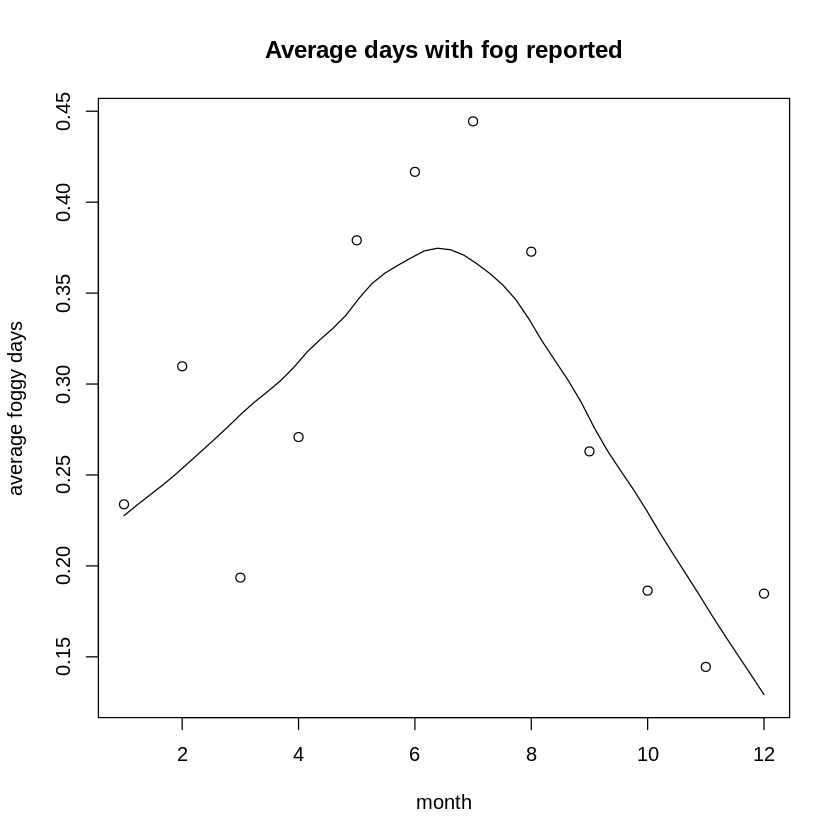

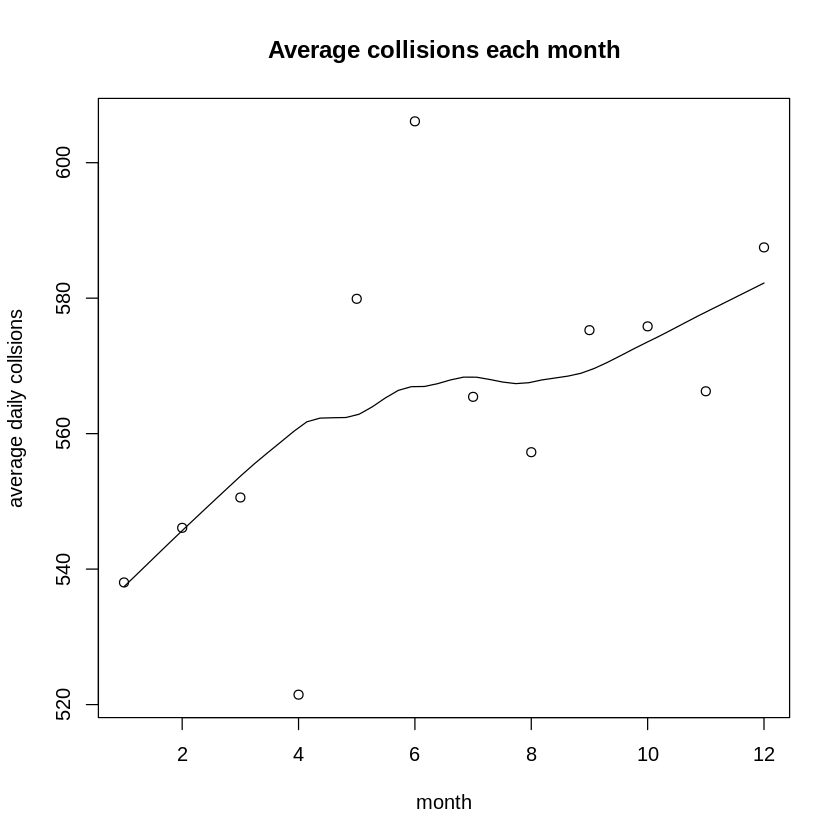

In [23]:
scatter.smooth(average_foggy_days$mo,average_foggy_days$amount, main = "Average days with fog reported", xlab = "month", ylab = "average foggy days")
scatter.smooth(average_monthly_collisions, main = "Average collisions each month", xlab = "month", ylab = "average daily collsions" )


The trend lines suggest no relationship between average foggy days each month and average daily collisions each month. It should be noted that although the plot of collisions by month suggests a monthly trend, it is not a significant trend line when the range of points is taken into consideration.

Looking at the value of correlation between the two will give a clearer indication of any possible relationship.



In [24]:
cor( average_foggy_days$amount, average_monthly_collisions$amount)


[1] 0.2076127

With a correlation of 0.2, there is a weak positive correlation between average foggy days per month and average daily collision rate per month, but it is weak and likely not significant, but could be investigated further at a daily level, with the caveat that the fog occurs more frequently in the early hours [REF https://www.wmcactionnews5.com/2020/10/15/breakdown-why-fog-forms-early-morning/ accessed 20/12/20 ].       

Following on from the earlier plot of the range of temperature on a daily basis each month, a clearer plot can be seen when using an average of the max and min values. 
This average can be condensed further by plotting on a monthly basis to look at seasonality.  


In [25]:

monthly_temp <- weather_collision %>% group_by(mo) %>% summarise(ave_temp = mean(temp_mean)) 
monthly_temp

`summarise()` ungrouping output (override with `.groups` argument)



mo,ave_temp
<int>,<dbl>
1,34.55423
2,34.86659
3,37.46109
4,46.21208
5,55.00625
6,62.97396
7,70.87330
8,70.68369
9,65.41685


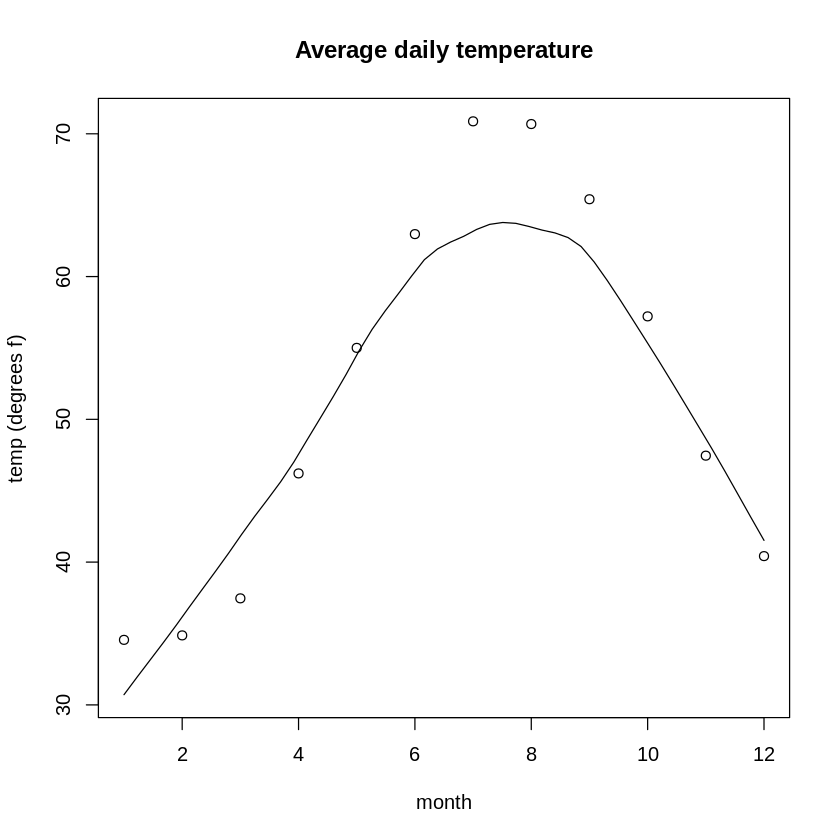

In [26]:
scatter.smooth (monthly_temp, main = "Average daily temperature", xlab = "month", ylab = "temp (degrees f)")

As previously carried out for the monthly average days recording fog, the correlation between monthly average daily temperatures and monthly average daily collisions may provide an insight into a relationship.       



[1] 0.4455254

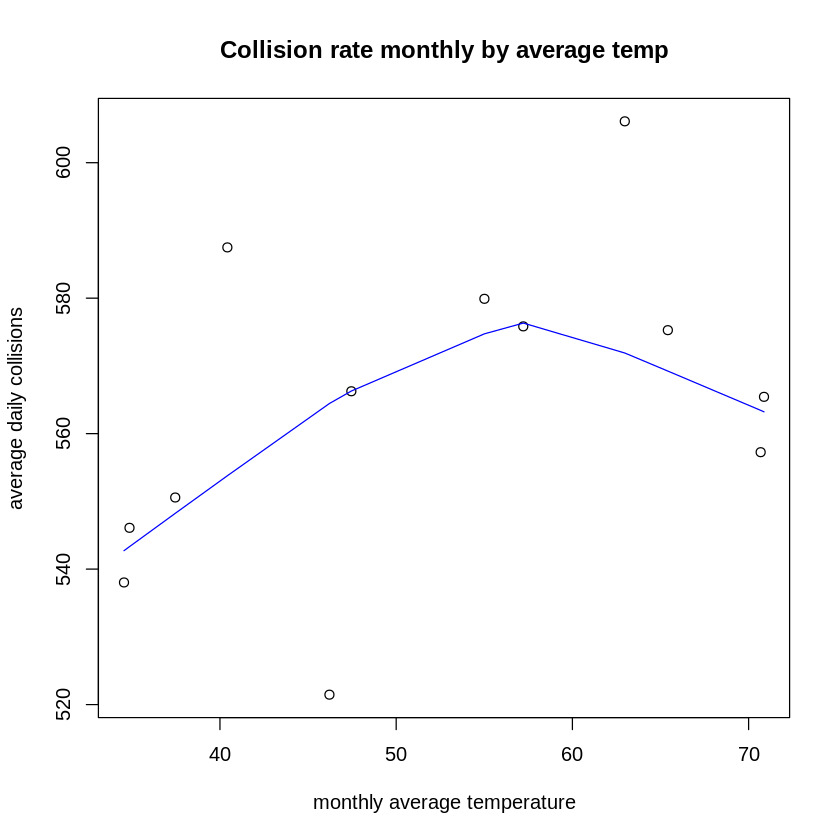

In [27]:
plot  (monthly_temp$ave_temp,average_monthly_collisions$amount,  main = "Collision rate monthly by average temp", xlab = "monthly average temperature", ylab = "average daily collisions"   )
lines (lowess (monthly_temp$ave_temp,average_monthly_collisions$amount), col = "blue")
cor(monthly_temp$ave_temp,average_monthly_collisions$amount)


The the level of detail has been reduced so far as to suggest that this plot has limited value, but the montly data used does give a good corellation of 0.45.

Unfortunatly, ss we have established that there a strong seasonality to the weather patterns for new york, this result may be slightly deceptive. There may be more factors than simply the temperature at play on this monthly cycle that are producing a falsly enhanced result, and bring us back to the phrase "correlation does imply causation".
Whilst this corellation of 0.45 may not be as questionable as some other spurious correlations ( such as the 0.66 correlation between *"Number of people who drowned falling in a pool & Films Nicholas Cage appeared in*" or the 0.95 correlation between "*Per Capita cheese consumption & Number of people who died by becoming entangled in their bedsheets*" [REF https://www.tylervigen.com/spurious-correlations accessed 1/1/21] it is still worth bearing in mind.  




For comparison, the same variables were re-plotted, but this time with daily temporality. 

[1] 0.06341648

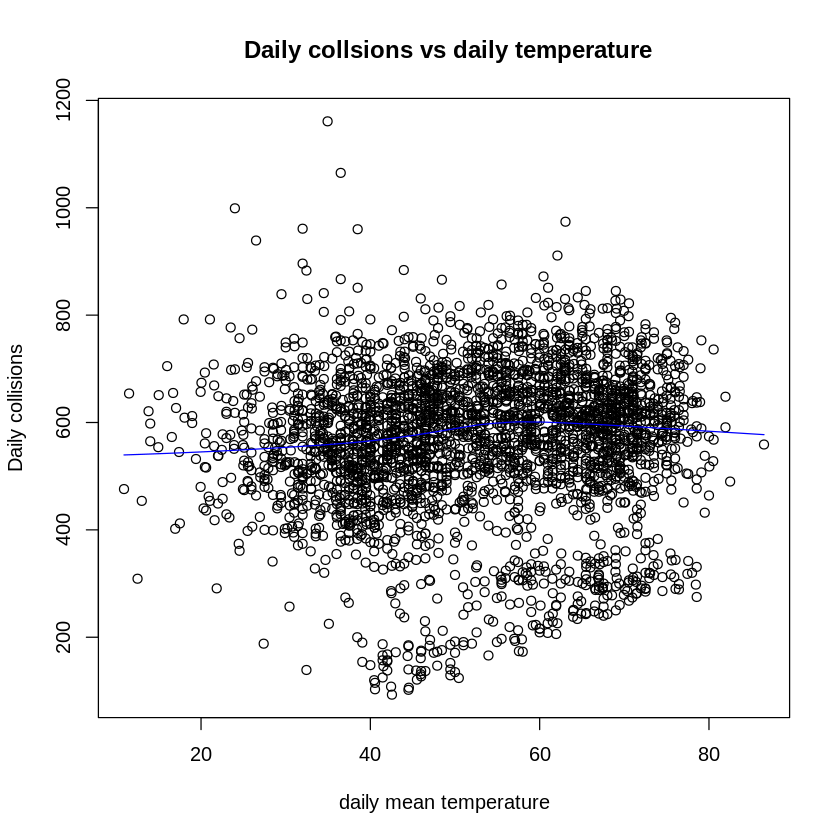

In [28]:
plot (weather_collision$temp_mean, weather_collision$NUM_COLLISIONS, main = " Daily collsions vs daily temperature", xlab = "daily mean temperature", ylab = "Daily collisions" ) 
lines(lowess(weather_collision$temp_mean, weather_collision$NUM_COLLISIONS), col = "blue")
cor(weather_collision$temp_mean, weather_collision$NUM_COLLISIONS)

The correlation is almost non-existent when looked at on a daily basis, but there is still some work to be done to the data to address the cluster of lower collisions. This will be discussed later.  

With a correlation of 0.45 the relationship between the monthly average daily temperatures and monthly average daily collisions begins to look significant, certainly more significant that the relationship was for fog, but as this relationship is not maintained at the daily level, there may be other factors at play. 


The final variables that remain to be examined for potential seasonal affects on collisions are visibilty and windspeed.


In [29]:
average_visibility  <- weather_collision %>% group_by(mo) %>% summarise(average_vis = mean(visib))
average_visibility # monthly average

average_windspeed <- weather_collision %>% group_by (mo) %>% summarise (average_wind = mean(wdsp))
average_windspeed  # monthly average

`summarise()` ungrouping output (override with `.groups` argument)



mo,average_vis
<int>,<dbl>
1,8.360887
2,8.143363
3,8.642742
4,8.393333
5,7.943145
6,7.742083
7,7.449104
8,8.229032
9,8.550000


`summarise()` ungrouping output (override with `.groups` argument)



mo,average_wind
<int>,<dbl>
1,12.281048
2,11.970796
3,12.752419
4,11.767083
5,10.266935
6,9.185000
7,7.783154
8,7.680645
9,8.822222


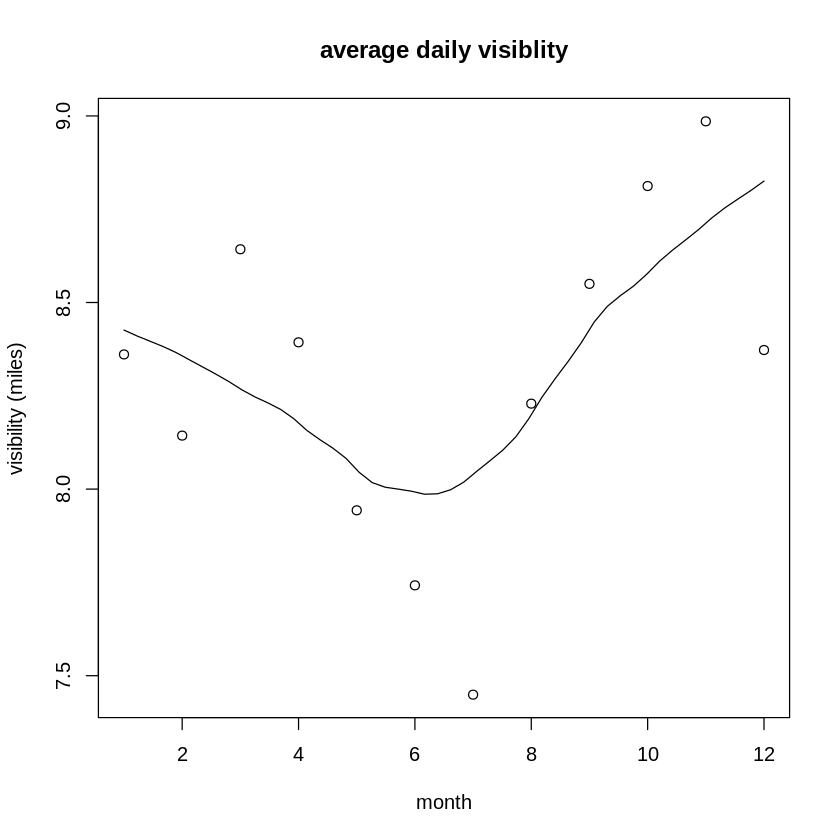

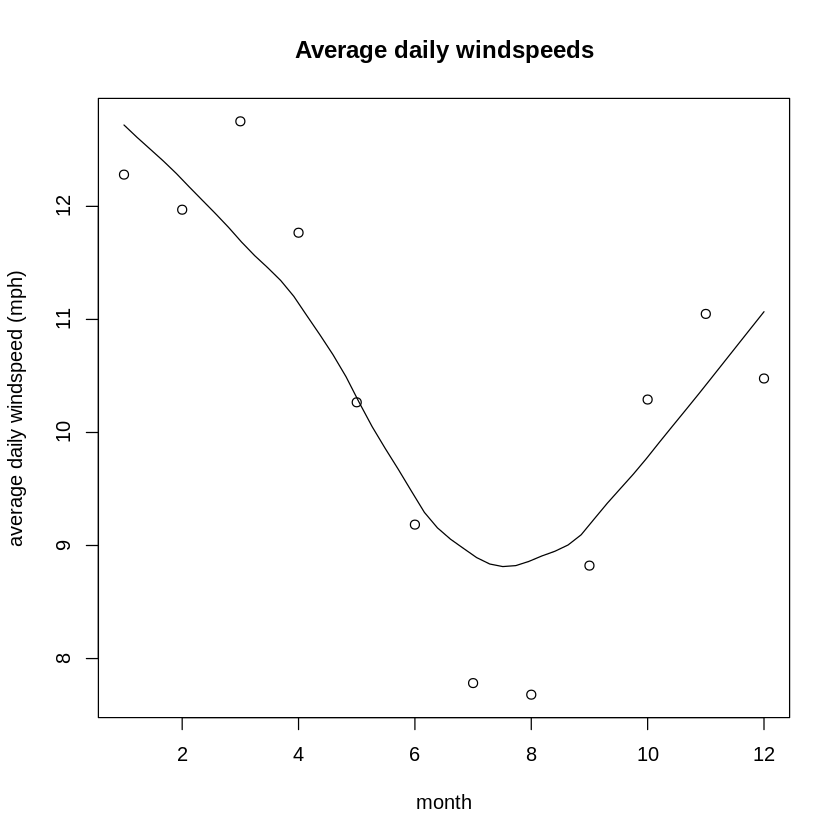

In [30]:
scatter.smooth( average_visibility, main = "average daily visiblity", xlab = "month", ylab = "visibility (miles)") 
scatter.smooth(average_windspeed, main = "Average daily windspeeds", xlab ="month", ylab = "average daily windspeed (mph)" )

That the curve of these two variables - windspeed and visibility - follow the opposite curve from the curve seen for fog is not surprising. If you consider that the optimum fog conditions require still air, or light winds [REF https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/fog/how-do-you-forecast-fog] then when there is an increase in wind, we would expect to see a decrease in fog.

This logical relationship is seen in the moderately strong negative correlation between wind speed and foggy days :- 


In [31]:
cor (average_windspeed$average_wind, average_foggy_days$amount)

[1] -0.6224402

When the correlation coefficient between the monthly average for collisions and the monthly average windspeed is determined, the value of 0.51 shows that there is a very slightly more than moderate correlation between the two variables. 
This will be explored further for a daily relationship.     

In [32]:
cor(average_windspeed$average_wind, average_monthly_collisions$amount)

[1] -0.5092802


**Moving from seasonal to daily granularity**


With the increased understanding of the initial exploration of the dataset has provided about the weather patterns of New York City, and the removal of duplicate dates and numeric values representing null values, it is time to look closer at the 3076 individual dates within the data set.






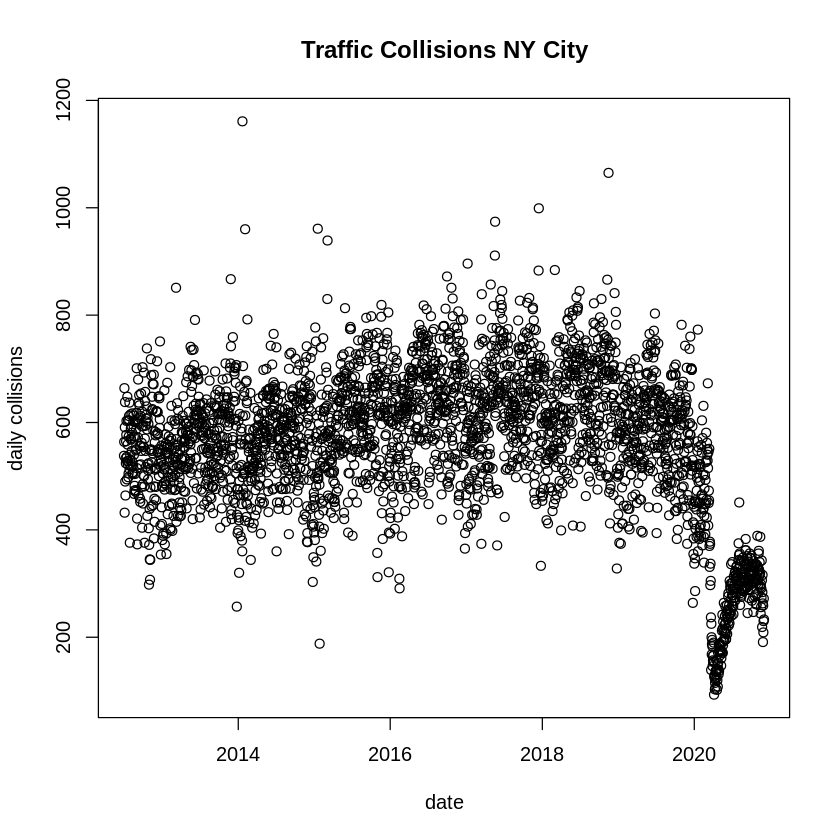

In [33]:
library(ggplot2)
plot (weather_collision$collision_date,weather_collision$NUM_COLLISIONS, main = "Traffic Collisions NY City" ,xlab = "date", ylab = "daily collisions" )

If we take a closer look at the data for 2020, we can look more clearly at the data where number of collisions suddenly decrease.  

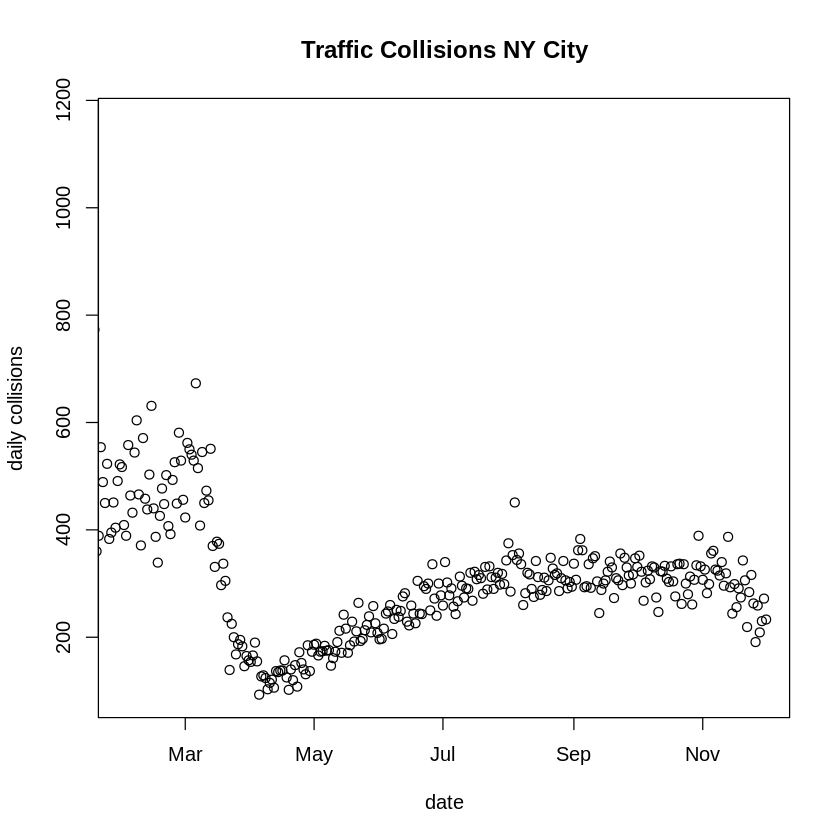

In [34]:
plot (weather_collision$collision_date,weather_collision$NUM_COLLISIONS, main = "Traffic Collisions NY City" ,xlab = "date", ylab = "daily collisions", xlim = as.Date(c ("2020-02-01","2020-11-30")) )

As might be expected, there is a dramatic reduction in the number of collisions reported from the beginning of March 2020. This corresponds with the arrival of Covid-19 in New York City, where there was a sudden increase in case from the first recorded case on March first 2020 [REF Wall Street Journal, 1st March 2020] to the decleration of a state of emergency on 3rd March [REF The New York Times, 3rd March 2020] and a State-wide "Stay at Home" Order on the 20th March [REF Fracescani.F.(2020) "Timeline :The first 100 days of New York Gov. Andrew Cuomo's COVID-19 response ABC NEWS 17th June 2020] 
As the reduced traffic due to the effects of the COVID-19 pandemic have a significantly greater impact than any weather event, it is only sensible to disregard dates later than the start of March 2020.

In order to give the data as logical a boundary as possible, and be evenly distributed throughout the calendar year, at the same time as removing the influnce of the COVID-19 pandemic, it was decided to trim the dataset to represent 8 full years, from the first of January 2013 to the 31st of December 2019.





In [36]:
collisions <- weather_collision [weather_collision$collision_date >=  "2013-01-01" &weather_collision$collision_date <= "2019-12-31"]  
collisions # data trimmed to 7 full calendar years, jan 2013 to Dec 2019

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,temp_mean
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,2016,1,25,2016-01-25,33.5,21.2,1021.4,10.0,6.5,8.9,NA,37.9,30.0,0.02,0,658,33.95
4,2016,1,28,2016-01-28,35.0,24.4,1016.1,10.0,4.3,8.9,NA,46.0,23.0,0.09,0,681,34.50
5,2014,1,17,2014-01-17,38.6,35.8,1014.8,6.7,3.7,8.9,NA,44.1,32.0,0.00,1,589,38.05
7,2013,1,13,2013-01-13,45.4,44.9,1020.7,4.3,5.8,9.9,NA,46.9,44.1,0.01,1,373,45.50
5,2017,1,20,2017-01-20,39.9,32.5,1015.5,10.0,4.3,9.9,NA,45.0,37.0,0.00,0,605,41.00
5,2016,1,29,2016-01-29,41.3,36.8,999.4,10.0,5.9,9.9,NA,45.0,23.0,0.00,0,645,34.00
2,2013,1,29,2013-01-29,35.4,34.9,1019.0,2.6,4.9,9.9,NA,37.4,33.1,0.08,1,542,35.25
5,2013,1,11,2013-01-11,38.0,31.4,1030.6,10.0,5.4,11.1,NA,44.1,32.0,0.00,0,660,38.05
5,2014,1,10,2014-01-10,28.8,22.6,1034.1,9.7,5.8,11.1,NA,39.2,12.9,0.00,0,667,26.05


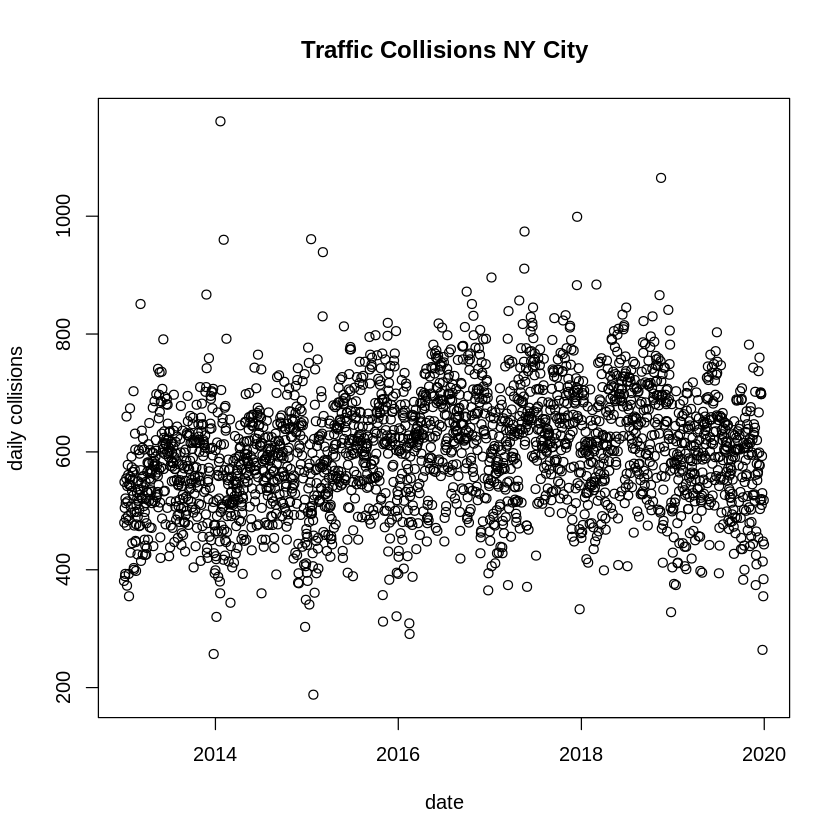

In [37]:
plot (collisions$collision_date,collisions$NUM_COLLISIONS, main = "Traffic Collisions NY City" ,xlab = "date", ylab = "daily collisions" )

With the 2020 data removed, if is possible to see a recurring annual pattern of collisions.

If order to see this more clearly, a reduction in the number of years plotted will allow a closer look.  

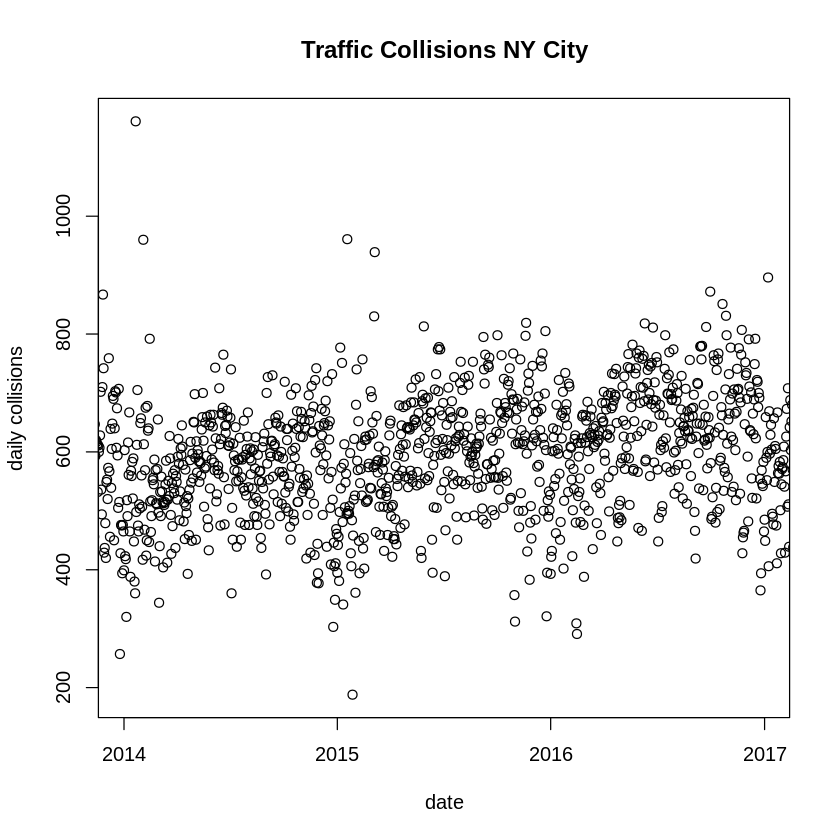

In [38]:
plot (collisions$collision_date,collisions$NUM_COLLISIONS, main = "Traffic Collisions NY City" ,xlab = "date", ylab = "daily collisions", xlim = as.Date(c("2014-01-01", "2016-12-31") ) )

In this clearly repeating pattern, there are some outling values, that are possibly data errors, but should be investigated further rather than simply  dismissing them as irrelevant.

For example,close to the start of 2014 there is one point where very large number of collisions are recorded. 
In order to focus more closely in to this time period, the dates plotted were reduced.


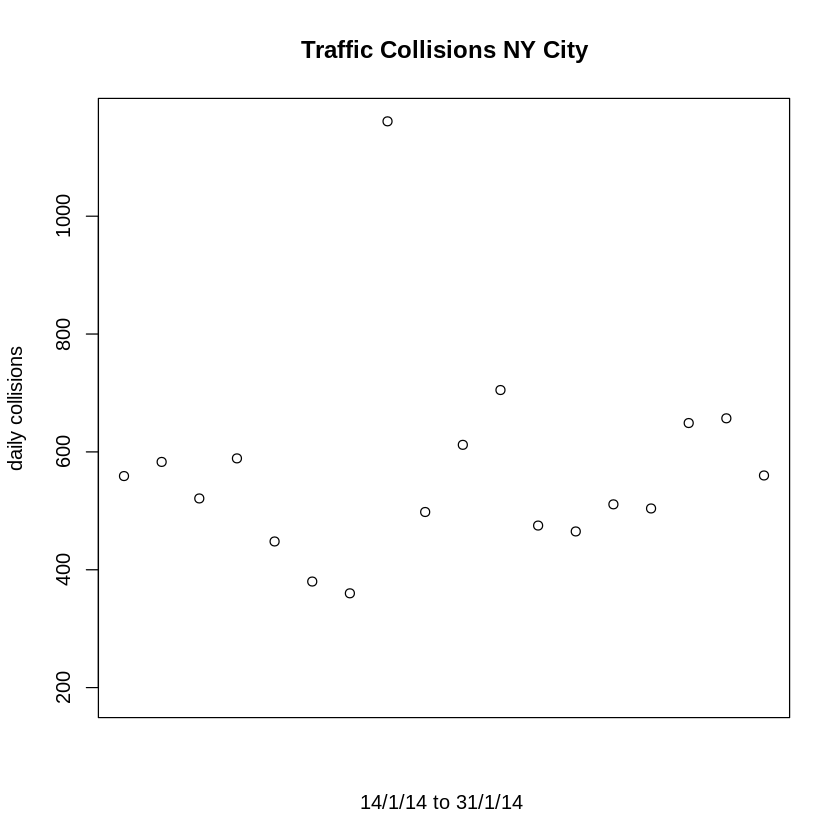

In [39]:
plot (collisions$collision_date,collisions$NUM_COLLISIONS, main = "Traffic Collisions NY City" ,xlab = "14/1/14 to 31/1/14 ", ylab = "daily collisions", xlim = as.Date(c("2014-01-14", "2014-01-31") ) )

In order to identify the details for this extreme number of collions, the dataset was searched for this and simlar values.

Two dates were identified.

In [40]:
which( collisions$NUM_COLLISIONS > 1000 ) # returns 146 2244
collisions [146]  # the "outlier" identifed above 
collisions [2244] # to look at this other date 

[1]  146 2244

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,temp_mean
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
2,2014,1,21,2014-01-21,29.2,17.5,1012.1,8.5,12.6,22,28.9,46.9,23,0,1,1161,34.95


day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,temp_mean
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
4,2018,11,15,2018-11-15,34,18.9,1033.3,9.9,10.6,20,28,44.1,28.9,0,0,1065,36.5


The outlier point of greatly increased daily collisions value may at first sight appear to be a simple error in the data, but a little research into the New York news for the middle of January 2014 reveals that there was a significant storm event in New York for that date. 

A newspaper at the time reported the words of one New Yorker  "It is dangerous to cross the street with cars slipping and sliding”. The commissioner of the Sanitation Dept. was quoted as saying that the roads in the evening rush were "not very good". Problems with snow ploughs left roads un-cleared and salt spreaders were malfunctioning due to the low temperature. Millions of city workers had a treacherous journey home. Emergency calls in New City were increased from 25 to 30% [REF The New York Times. 21st Jan 2014]

Yet, as discussed previously, the dataset has only one record of snow, on the  9th November 2012, so it would appear that in this case the error is not in the number of collsions reported, but in the lack of any record of snow depth.

It was of course a chance that this significant snow date record had been lost in the previously discussed data cleaning, where duplicate dates in 2014 were removed. These duplicate dates coincidentally covered the time period that included this storm event, so a return to the original, uncleaned, dataset was carried out to check for this possiblity.  



In [41]:
which( weather_collision1$sndp != 999.9 ) #checking original dataset for non-null values - returns index 2874
weather_collision1 [2874]

[1] 2874

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
5,2012,11,9,2012-11-09,43.3,25.8,1016.1,9.8,9.6,30.9,43.9,53.1,36,0.17,3.9,0,688


The only snow date returned from the original unaltered dataset was confirmed as the one date previously identified, on the 9th November 2012.

In conclusion, the "error" for the date where the collision reports were approximately twice the average was not as a result of any error in the quantity of collisions reported. The high quantity of collisions were in all probability a genuine value, and the error instead lies in the absence of a snow report for the date of 21st January 2014, although the newspaper report mentions 14 inches of snow, which is greatly in excess of the 3.9 reported.

It is possible that the extremely low temperatures reported in the media, as collaborated by the minimum of 23 degrees Fahrenheit in the dataset( -5 degrees Centigrade), caused sensors to malfunction or it is possible that the transport chaos of the day impacted upon the presence of an operator required to undertake a manual recording. Eother way, this information is lost. 



Following on from this check for this pont, further checking was carried out for the other instance of very high collisions reported for one day -


In [42]:
which ( collisions$NUM_COLLISIONS > 1000 )
collisions [146]  # identified and discussed above 
collisions [2244] # another high collisions date to investigate ! 

[1]  146 2244

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,temp_mean
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
2,2014,1,21,2014-01-21,29.2,17.5,1012.1,8.5,12.6,22,28.9,46.9,23,0,1,1161,34.95


day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,temp_mean
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
4,2018,11,15,2018-11-15,34,18.9,1033.3,9.9,10.6,20,28,44.1,28.9,0,0,1065,36.5


Likewise, on the only other point in the dataset where the number of collisions exceeded 1000, that of the 15th November 2018, the New York Spectrum News service reported the "First snowfall of the season hits NYC" [REF https://www.ny1.com/nyc/all-boroughs/news/2018/11/15/snow-alert-in-effect-for-nyc-thursday- accessed 30/12/2020] As on the 21st November 2014, there was no record of snow in the orginal dataset although the media reported around 3 inches of snow. The minimum temperature recorded in the database was likewise low on this day, at 28.9 degrees Fahrenheit ( -1.7 degrees C ) but the reason that this snowfall was not recorded either remains unknown. 

The conclusion is that snow records in this dataset are unreliable.  





On the other end of the spectrum of daily collisions reported, there are a number of dates where the values of collisions reported are significantly below the average, and that repeat for each year. From the plot of all the selected years, these are visible approximately below the 400 collisions a day value.

As part of an investigation into the circumstances of these particularly low points, they can be checked against the recurring dates for public holidays in New York City.  

In [43]:
public_holiday <- c('1-1', '1-20', '2-12', '2-17', '5-1', '5-10', '5-25', '6-19', '6-21', '7-03', '7-04', '9-07', '10-12', '11-11', '11-26', '12-24', '12-25')
#public holidays identified by month-day 
quiet_days <- which(collisions$NUM_COLLISIONS < 350 ) #returns index for 6 rows where collisions are less than 400 
testing <- collisions [quiet_days] # the rows for at "the quiet days"  
testing # to look at the days
is_it_holiday <- paste(testing$mo,testing$da,sep="-" ) #retreving "month-day" for each of these rows 
print(is_it_holiday[is_it_holiday %in% public_holiday]) # to check the comparisons



day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,temp_mean
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
7,2015,1,11,2015-01-11,27.1,12.1,1035.5,10.0,8.8,13.0,17.1,37.0,19.9,0.00,0,341,28.45
7,2014,1,5,2014-01-05,37.8,33.5,1026.0,9.0,8.6,18.1,25.1,42.1,27.0,0.00,0,320,34.55
2,2015,1,27,2015-01-27,30.2,27.9,993.7,0.6,39.3,48.0,62.9,33.8,21.0,0.40,1,188,27.40
1,2016,2,15,2016-02-15,18.6,7.0,1034.4,9.3,6.0,18.1,NA,35.6,8.1,0.00,0,291,21.85
7,2016,2,14,2016-02-14,5.8,-6.7,1024.1,8.5,16.3,22.9,36.9,27.0,-2.0,0.00,0,309,12.50
7,2014,3,2,2014-03-02,33.5,28.1,NA,9.8,7.6,11.1,NA,37.4,32.0,0.00,0,344,34.70
7,2015,11,1,2015-11-01,57.0,49.8,1016.1,9.9,8.7,15.9,NA,62.1,52.0,0.00,0,312,57.05
3,2019,12,25,2019-12-25,35.6,28.9,1022.2,10.0,4.7,8.0,NA,46.9,28.0,0.00,0,264,37.45
5,2015,12,25,2015-12-25,56.1,52.9,1021.2,4.0,4.4,13.0,NA,66.0,50.0,0.37,1,321,58.00


[1] "12-25" "12-25" "12-25" "12-25" "12-25" "12-25"


Looking more closely at those rows where the number of collisons fell below 350, we find 14. Out of those 14, 6 were Christmas days. This seems to be the only public holiday that impacts significantly upon the number of collisions in the dataset. 
Others lows include 1/11/2015, date of the New York Marathon; 6/1/2014, another heavy snow day not reported in the dataset; 27/1/2015, a driving ban in New York City due to a storm forecast [REF https://www.bbc.co.uk/news/world-us-canada-30987053 accessed 31/12/20 ] ; 14 and 15/2/16, no particular reason identified but these were both exceptionally cold days ;  2 march 2014, no particular cause identified ; 1 nov 2015, New York Marathon.

In conclusion, outlying data points that at first sight appear to be data errors frequently transpire to be as the result of some real life event that are not apparent within the simple numbers of the dataset.

It is worth noting that outside of the 6 Christmas dates, 5 out of the remaining 8 fell on a Sunday, but as other exceptional events within the City were also identified to fall on Sundays, it is not necessarily simply the fact that they fall on Sunday that is the important factor.

With this information in hand, it becomes reasonaly to reduce the dataset by removing these dates where extraordinary circumstances are at play. 


In [44]:
collisions <- weather_collision [weather_collision$NUM_COLLISIONS > 350 ] 
collisions
#quiet_days <- which(collisions$NUM_COLLISIONS < 350 ) #these need removed 

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,temp_mean
<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
5,2020,1,24,2020-01-24,37.3,33.7,1028.5,6.5,3.3,8.0,NA,46.0,19.9,0.00,1,523,32.95
1,2020,1,13,2020-01-13,42.5,37.0,1029.6,9.5,9.2,13.0,NA,57.0,39.9,0.01,0,473,48.45
2,2020,1,7,2020-01-07,39.0,26.6,1016.6,10.0,8.0,13.0,NA,43.0,24.1,0.00,0,402,33.55
3,2020,1,15,2020-01-15,43.9,38.3,1019.4,8.2,5.4,14.0,15.0,51.1,35.1,0.02,1,506,43.10
4,2020,1,30,2020-01-30,31.6,19.4,1023.4,10.0,9.4,15.0,NA,37.0,21.9,0.00,0,522,29.45
1,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15.0,NA,43.0,24.1,0.01,1,455,33.55
5,2020,1,3,2020-01-03,45.8,42.9,1010.3,7.0,10.3,15.0,NA,46.9,33.1,0.00,1,452,40.00
7,2020,1,26,2020-01-26,44.3,40.7,1006.4,6.5,13.0,19.0,28.0,51.1,36.0,0.44,1,395,43.55
4,2020,1,2,2020-01-02,39.6,28.9,1011.8,10.0,13.0,19.0,26.0,46.0,33.1,0.01,0,410,39.55


To look for possible trends in the collisions by day of the week, we can use the individual days, identified as a number from 1-7, with 1 as Monday.


Although this may be closer examination of the data than necessary, it is a quick task to visualise the daily collsions for each year individually to be assertain that any weekly trend repeats for each year.
    

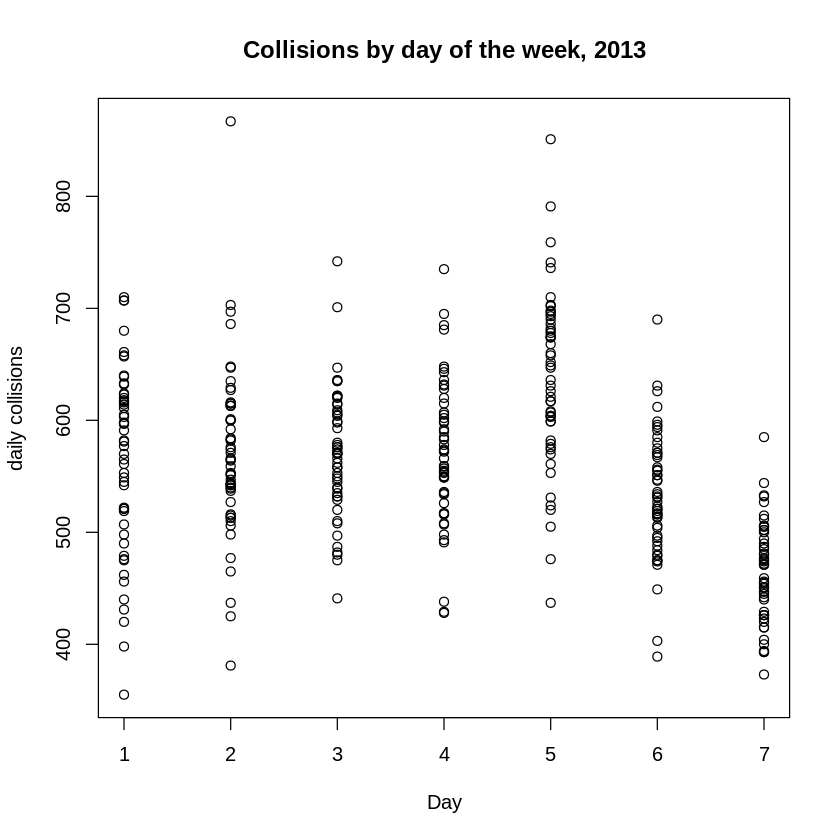

In [45]:
collisions_2013 <- filter (collisions,(year == 2013))
plot(collisions_2013$day, collisions_2013$NUM_COLLISIONS, main = "Collisions by day of the week, 2013", xlab = "Day", ylab = "daily collisions")

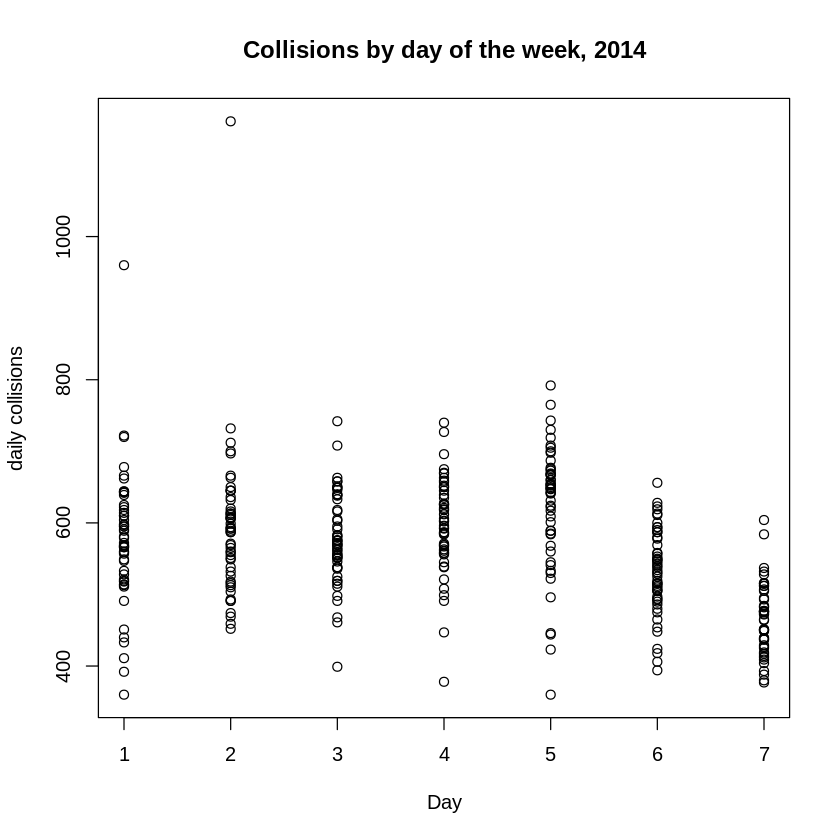

In [46]:
collisions_2014 <- filter (collisions,(year == 2014))
plot(collisions_2014$day, collisions_2014$NUM_COLLISIONS, main = "Collisions by day of the week, 2014", xlab = "Day", ylab = "daily collisions")

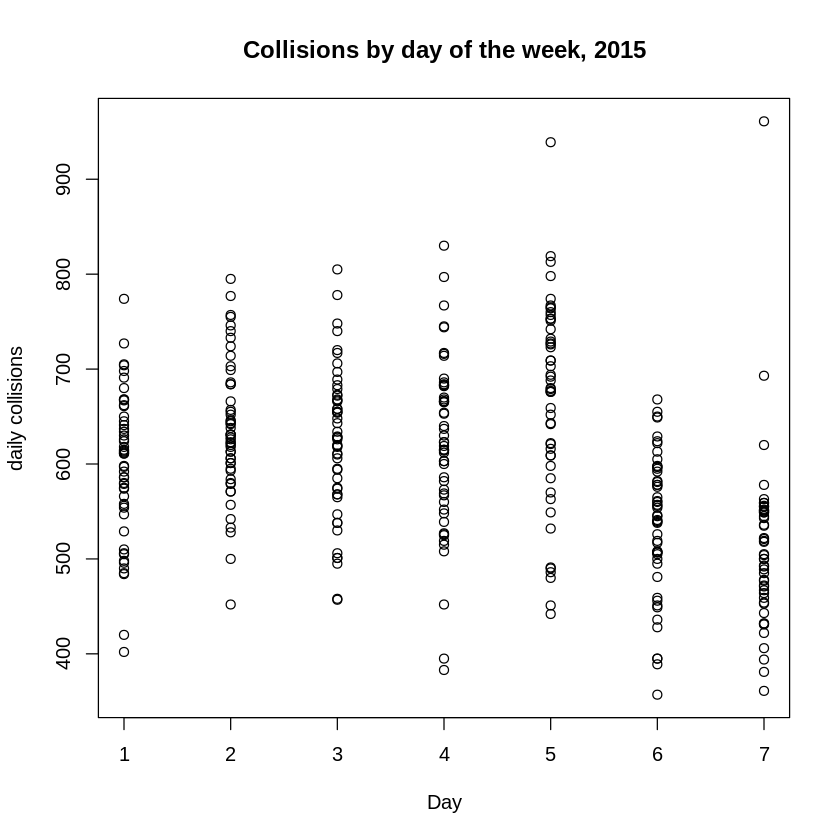

In [47]:
collisions_2015 <- filter (collisions,(year == 2015))
plot(collisions_2015$day, collisions_2015$NUM_COLLISIONS, main = "Collisions by day of the week, 2015", xlab = "Day", ylab = "daily collisions")

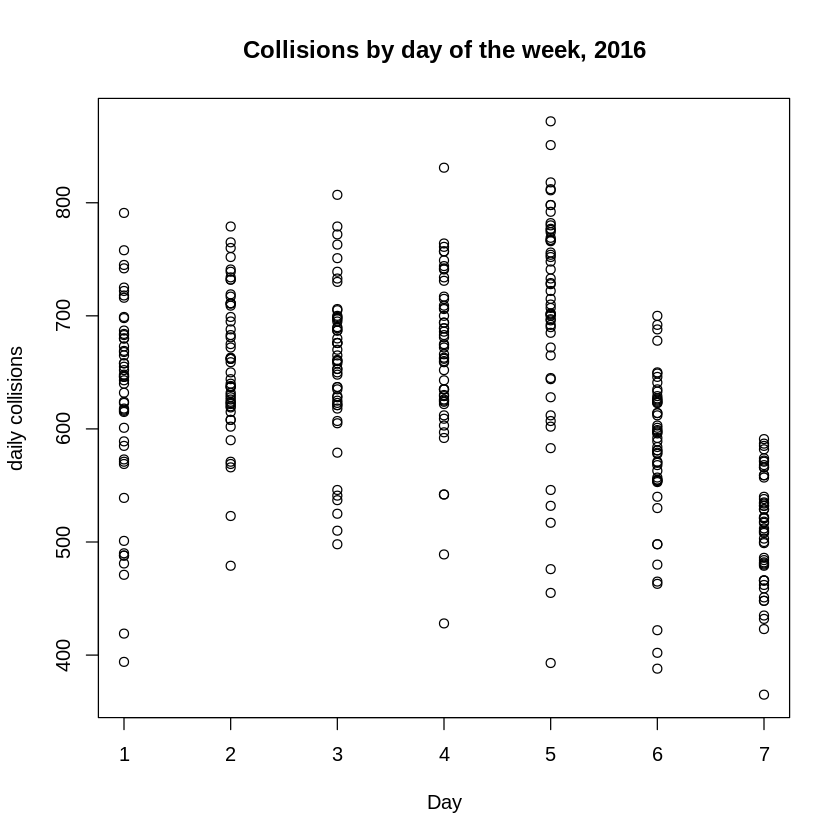

In [48]:
collisions_2016 <- filter (collisions,(year == 2016))
plot(collisions_2016$day, collisions_2016$NUM_COLLISIONS, main = "Collisions by day of the week, 2016", xlab = "Day", ylab = "daily collisions")

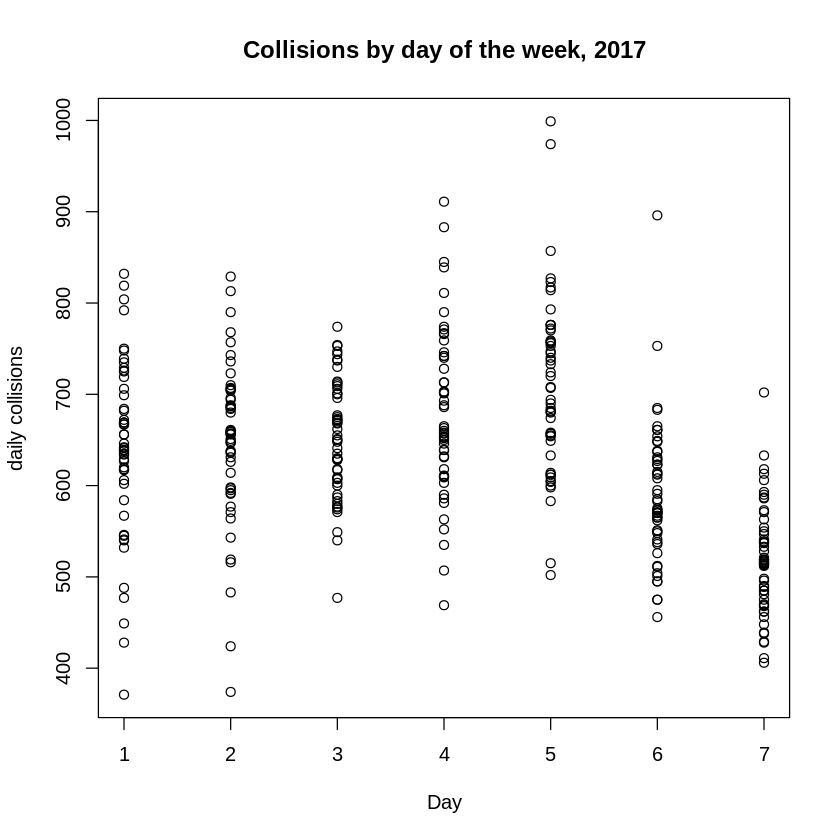

In [49]:
collisions_2017 <- filter (collisions,(year == 2017))
plot(collisions_2017$day, collisions_2017$NUM_COLLISIONS, main = "Collisions by day of the week, 2017", xlab = "Day", ylab = "daily collisions")

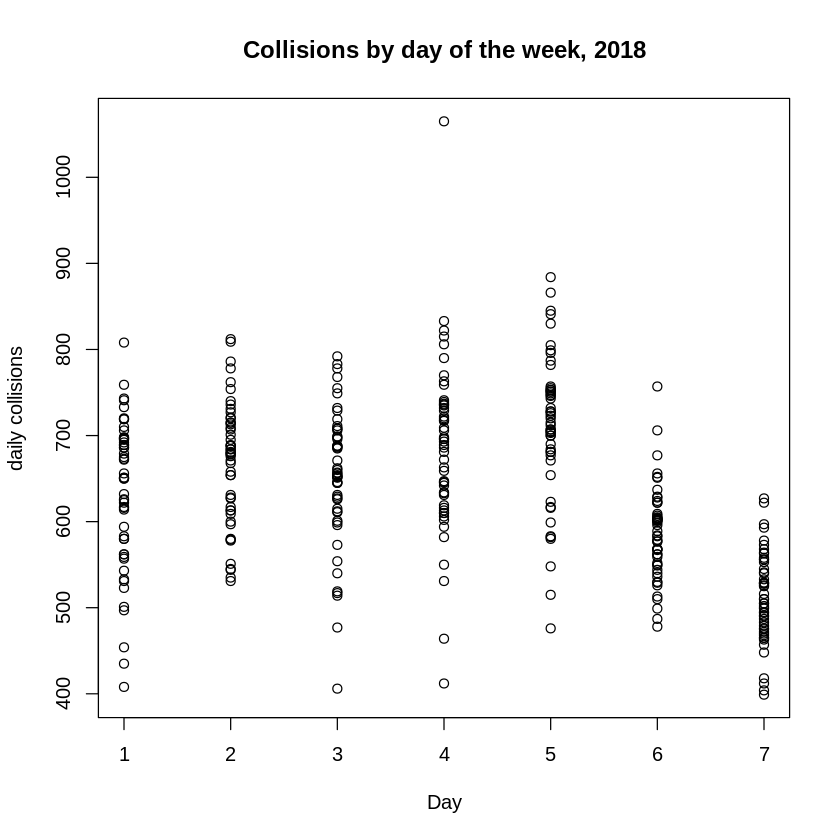

In [50]:
collisions_2018 <- filter (collisions,(year == 2018))
plot(collisions_2018$day, collisions_2018$NUM_COLLISIONS, main = "Collisions by day of the week, 2018", xlab = "Day", ylab = "daily collisions")

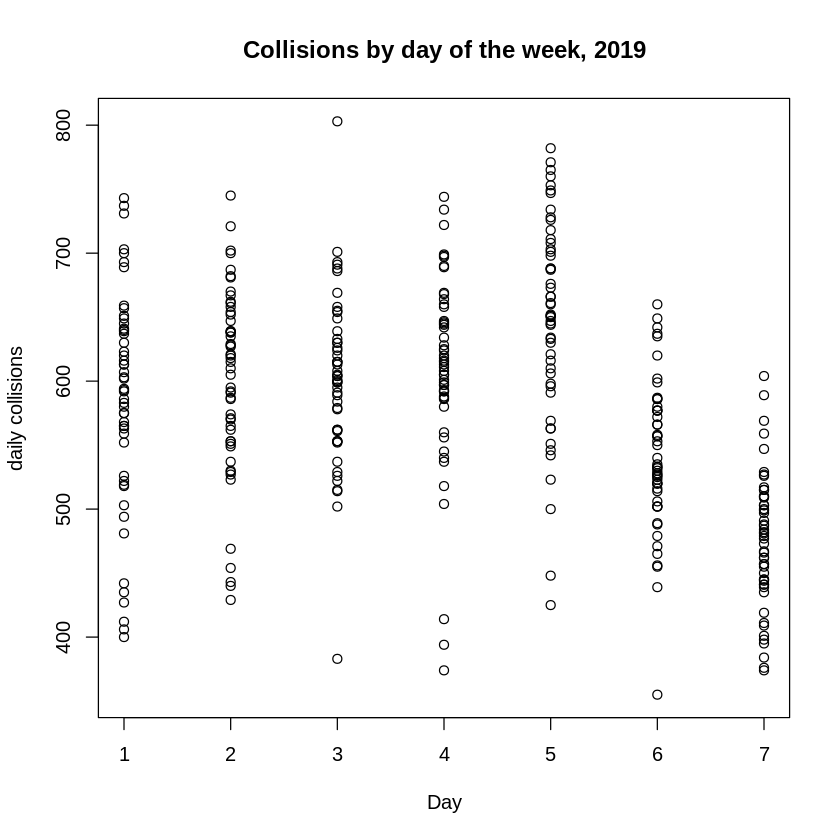

In [51]:
collisions_2019 <- filter (collisions,(year == 2019))
plot(collisions_2019$day, collisions_2019$NUM_COLLISIONS, main = "Collisions by day of the week, 2019", xlab = "Day", ylab = "daily collisions")

For each year we can see the same pattern of numbers of collisions repeated, albeit with a small variation between years, the reduction in collisions reported over the weekend, with the smallest number occurring on Sunday, can be seen.

With this yearly cycle established, it is reasonable to incorporate the data for all of the year 2013 - 2019 together in one plot.
    

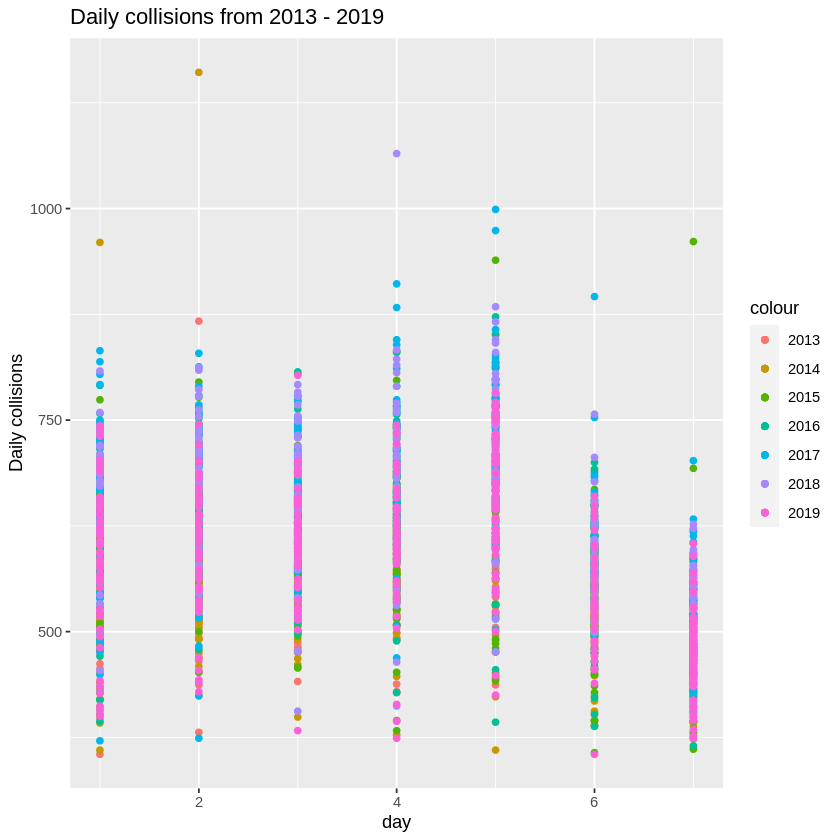

In [52]:
coll <- ggplot() +
 geom_point(data = collisions_2013, aes( day, NUM_COLLISIONS , colour = "2013") )+
 geom_point(data = collisions_2014, aes( day, NUM_COLLISIONS , colour = "2014") )+
 geom_point(data = collisions_2015, aes( day, NUM_COLLISIONS , colour = "2015") )+
 geom_point(data = collisions_2016, aes( day, NUM_COLLISIONS , colour = "2016") )+
 geom_point(data = collisions_2017, aes( day, NUM_COLLISIONS , colour = "2017") )+
 geom_point(data = collisions_2018, aes( day, NUM_COLLISIONS , colour = "2018") )+
 geom_point(data = collisions_2019, aes( day, NUM_COLLISIONS , colour = "2019") )

coll + ggtitle("Daily collisions from 2013 - 2019") + ylab("Daily collisions")


To look at the daily trend more clearly, a trend line may help to visualise any pattern.


Years' data can be visulised together. 

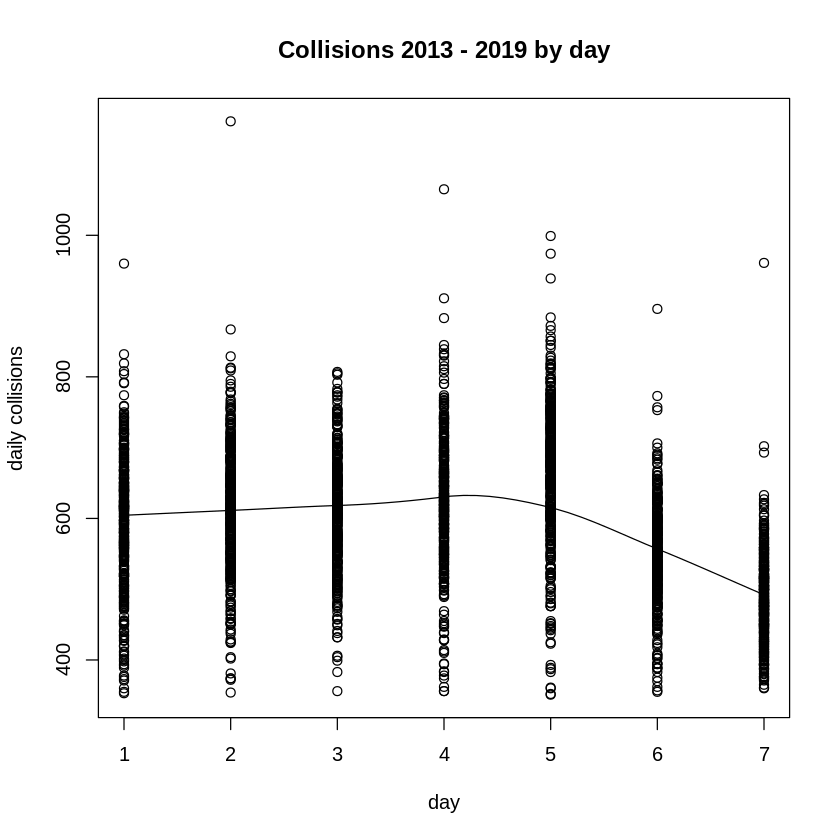

In [53]:
scatter.smooth (collisions$day, collisions$NUM_COLLISIONS, main = "Collisions 2013 - 2019 by day", xlab = "day", ylab = "daily collisions")

In [54]:
cor (collisions$day, collisions$NUM_COLLISIONS)


[1] -0.2807623

There is no clear relationship evident at this point. Having identified that the outlying values are due to particular special events, and therefore not expected to influence the correlation that might be expected in restricting the range of data [REF Bland & Altman (2011) BMJ 342:556]it is reasonable to remove these values to reduce variability. This brings us closer to the understanding that datapoints should not be too far from such a regression line[REF Handbook of Geophysical Exploration (2007) section 5.2.2 ]


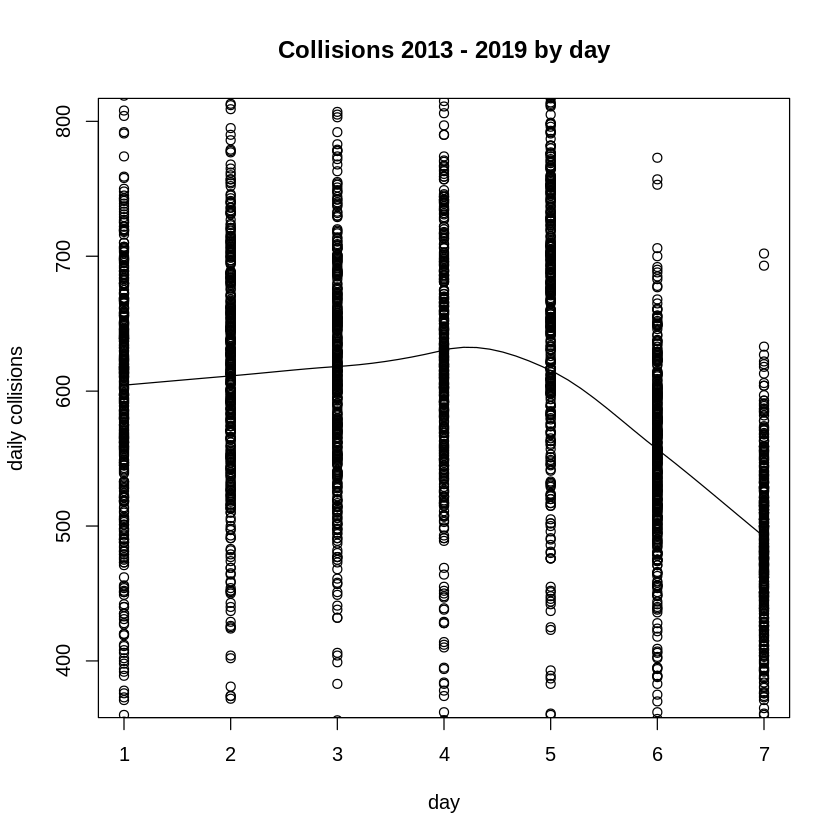

In [55]:
scatter.smooth (collisions$day, collisions$NUM_COLLISIONS, main = "Collisions 2013 - 2019 by day", xlab = "day", ylab = "daily collisions", ylim = c(375,800))


In order to look at the correlation of this reduced data range, there is a need to reduce the data used accordingly. 


In [56]:
without_the_outliers <- filter(collisions, ( NUM_COLLISIONS >375) & (NUM_COLLISIONS < 800) ) #remove the outliers
#without_the_outliers  returns data table of 2480 rows
cor ( without_the_outliers$day, without_the_outliers$NUM_COLLISIONS)

[1] -0.3106617

With the removal of the outlying values the correlation is now stronger, although still weak. 
It is very clear the numbers of collisions reduce at the weekend, following a slow but steady rise though the weekdays.   
By rearranging the days of the week, a clearer relationship may emerge.


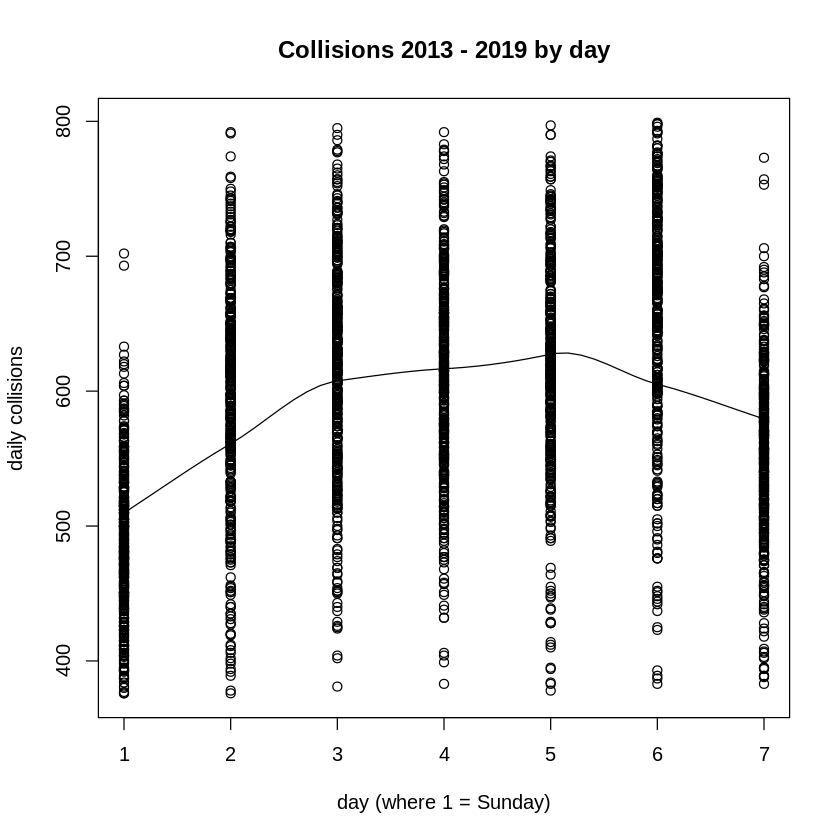

In [57]:
without_the_outliers$day <- without_the_outliers$day+1        # adding one "day" value to each 
without_the_outliers$day[without_the_outliers$day == 8 ] <-1  # changing the new value of sunday to be 1
#without_the_outliers # to check

scatter.smooth (without_the_outliers$day, without_the_outliers$NUM_COLLISIONS, main = "Collisions 2013 - 2019 by day", xlab = "day (where 1 = Sunday)", ylab = "daily collisions", ylim = c(375,800))



Now the trend line is transformed, and the effect of this is possible to assertain by re-checking the correlation between day of the week and collisions.


In [58]:
cor ( without_the_outliers$day, without_the_outliers$NUM_COLLISIONS)

[1] 0.2341033

This has changed the nature of the trend, but with the first day of the weekend - namely Saturday - also having a reduced number of collsions reported, it is sensible to also move this day towards the start of the week, so the process above is repeated once more, to give the order of days as Sat,Sun,Mo,Tu,We,Th,Fr.  

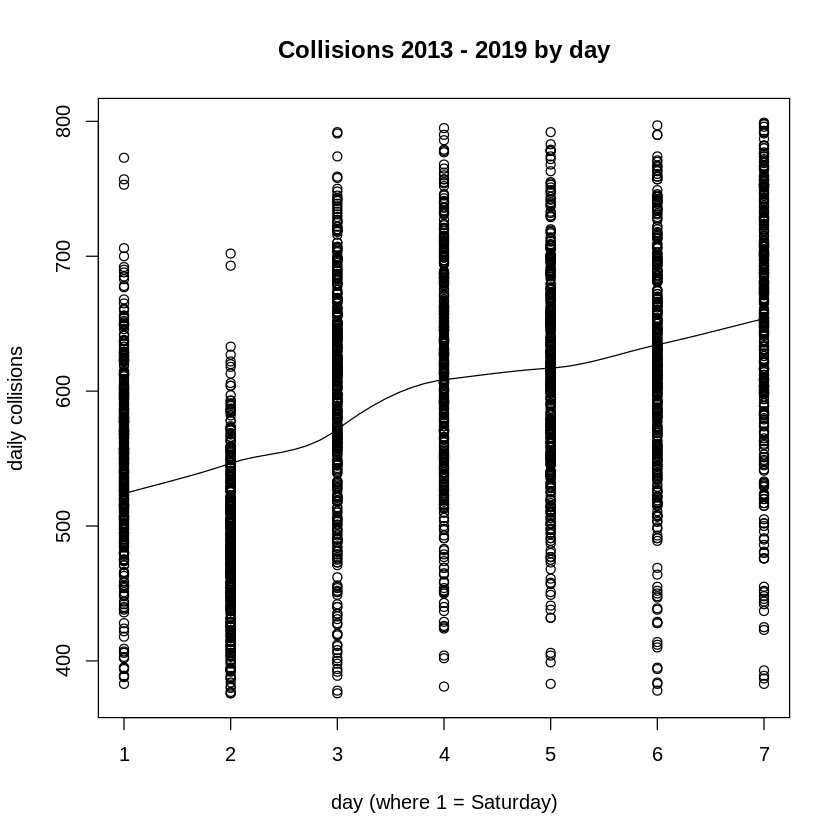

In [59]:
without_the_outliers$day <- without_the_outliers$day+1        # adding one "day" value to each 
without_the_outliers$day[without_the_outliers$day == 8 ] <-1  # changing the new value of Saturday to be 1
#without_the_outliers # to check

scatter.smooth (without_the_outliers$day, without_the_outliers$NUM_COLLISIONS, main = "Collisions 2013 - 2019 by day", xlab = "day (where 1 = Saturday)", ylab = "daily collisions", ylim = c(375,800))


In [60]:
cor ( without_the_outliers$day, without_the_outliers$NUM_COLLISIONS)

[1] 0.4443412

With a transformation of the shape of the week, there is a transformation of the correlation between day of the week and number of collisions reported for that day. 
This correlation of 0.46 represents a strong correlation, and this is the format of the dataset that we will use to explore the possibilty of a correlation between the collisions for a given day of the week and the weather variables for that given day.  


**Investigating possible relationships between numbers of collsions for any given day of the week and weather variables.**

The previous steps have produced the *collisions* dataset, which will now be used to look at the potential relationship between the daily number of collisions and the weather variables. Best practice for cleaning data has been followed [REF Rahm & Do (2000) Data Cleaning; Problems and Current Approaches. Data Engineering 23.4 pg 3 ] and the detecting and removing of errors and inconsistencies from the data has improves the quality of anaysis that may be carried out. Where numbers of collisions are exeptionally low, or exceptionally high, these have been identified and also removed from the data.

Instances where the data is lacking in expected information ( eg in the lack of reliable snow records) or where specific values are used to represent NULL have ben identified and in looking at "the bigger picture" the variations in weather for New York City are much better understood.


The first step is to look at a summary of our prepared dataset.






In [61]:
summary(without_the_outliers)
without_the_outliers

      day             year            mo              da       
 Min.   :1.000   Min.   :2012   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.00   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.00   Median :16.00  
 Mean   :3.985   Mean   :2016   Mean   : 6.59   Mean   :15.64  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.00   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.00   Max.   :31.00  
                                                               
 collision_date            temp            dewp            slp        
 Min.   :2012-07-01   Min.   : 9.30   Min.   :-4.60   Min.   : 989.1  
 1st Qu.:2014-05-31   1st Qu.:40.60   1st Qu.:32.10   1st Qu.:1012.2  
 Median :2016-04-29   Median :52.10   Median :45.30   Median :1016.7  
 Mean   :2016-05-05   Mean   :51.91   Mean   :44.27   Mean   :1016.8  
 3rd Qu.:2018-04-11   3rd Qu.:64.50   3rd Qu.:58.62   3rd Qu.:1021.7  
 Max.   :2020-11-13   Max.   :86.70   Max.   :74.10   Max.   :

day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,temp_mean
<dbl>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
7,2020,1,24,2020-01-24,37.3,33.7,1028.5,6.5,3.3,8.0,NA,46.0,19.9,0.00,1,523,32.95
3,2020,1,13,2020-01-13,42.5,37.0,1029.6,9.5,9.2,13.0,NA,57.0,39.9,0.01,0,473,48.45
4,2020,1,7,2020-01-07,39.0,26.6,1016.6,10.0,8.0,13.0,NA,43.0,24.1,0.00,0,402,33.55
5,2020,1,15,2020-01-15,43.9,38.3,1019.4,8.2,5.4,14.0,15.0,51.1,35.1,0.02,1,506,43.10
6,2020,1,30,2020-01-30,31.6,19.4,1023.4,10.0,9.4,15.0,NA,37.0,21.9,0.00,0,522,29.45
3,2020,1,6,2020-01-06,33.5,24.0,1013.2,9.9,5.3,15.0,NA,43.0,24.1,0.01,1,455,33.55
7,2020,1,3,2020-01-03,45.8,42.9,1010.3,7.0,10.3,15.0,NA,46.9,33.1,0.00,1,452,40.00
2,2020,1,26,2020-01-26,44.3,40.7,1006.4,6.5,13.0,19.0,28.0,51.1,36.0,0.44,1,395,43.55
6,2020,1,2,2020-01-02,39.6,28.9,1011.8,10.0,13.0,19.0,26.0,46.0,33.1,0.01,0,410,39.55


In [62]:
#install.packages("ggplot2") #only needs done once. Commented out to reduce runtime. 
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Putting selected variables from the collisions dataset into a matrix of correlation is a method of looking at the numerics of the data relationships. Using a heatmap provides a clearer visualisation of these relationships. 

In [63]:

library(reshape2)
library(ggplot2)
cordata <- without_the_outliers[,c(1,2,3,4,6,8,9,16, 18, 17) ] # day,year, mo, date, temp,slp,visb, fog, temp_mean,num_collisions 
corcollision <- round(cor(cordata),2) 
corcollision





Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt


The following object is masked from ‘package:tidyr’:

    smiths




,day,year,mo,da,temp,slp,visib,fog,temp_mean,NUM_COLLISIONS
day,1.00,0.00,-0.02,0.00,-0.01,NA,-0.01,0.02,0.00,0.44
year,0.00,1.00,-0.16,-0.01,-0.12,NA,-0.03,0.07,-0.11,0.13
mo,-0.02,-0.16,1.00,0.00,0.39,NA,0.06,-0.07,0.39,0.17
da,0.00,-0.01,0.00,1.00,0.00,NA,0.03,-0.03,0.00,-0.04
temp,-0.01,-0.12,0.39,0.00,1.00,NA,-0.19,0.21,0.99,0.19
slp,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
visib,-0.01,-0.03,0.06,0.03,-0.19,NA,1.00,-0.70,-0.19,-0.07
fog,0.02,0.07,-0.07,-0.03,0.21,NA,-0.70,1.00,0.22,0.06
temp_mean,0.00,-0.11,0.39,0.00,0.99,NA,-0.19,0.22,1.00,0.20
NUM_COLLISIONS,0.44,0.13,0.17,-0.04,0.19,NA,-0.07,0.06,0.20,1.00


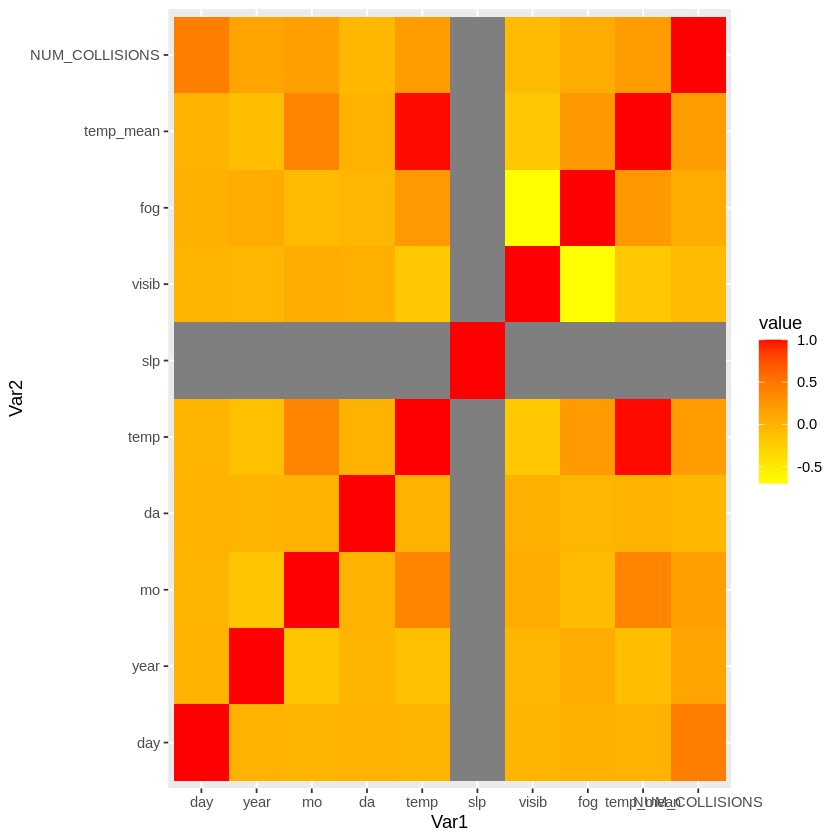

In [64]:
melted_data <- melt(corcollision)
ggplot(melted_data, aes(Var1,Var2, fill = value, label = value)) + geom_tile() +scale_fill_gradient(low = "yellow", high = "red") 

At once, humorously yet reassuring, the strongest correlation is shown to be that of the perhaps most obvious - the strong inverse correlation (-0.7) between fog and visibilty.

No other correlation is shown to be as strong, although some are self evident, such as the 0.99 correlation between mean temperature(temp_mean) and temperature(temp) 

Some other correlation values also appear logical, such as the case of the almost no correlation ( -0.04) shown between the number of collisions and day of the month (da).

Reasurringly, given the aims of this exercise to focus on days of the week, there is a stronger correlation (0.44) given for the number of collisions and the day of the week.




Prior to removing the data from 2020 (" The first year of the Covid Pandemics" as it may be called in the future ) the relationship between daily collisions and daily average temperature was plotted, and produced a correlation of only 0.03. 

By replotting that same realtionship, but this time without the 2020 data, the pattern of dots appears in a more regular fashion, but still without an evident relationship. 

The effect of removing the erroneous 2020 data can be demonstrated by the fact that the correlation, although still very weak, has risen to 0.2, as can also seen in the correlation matrix above.  


[1] 0.1973271

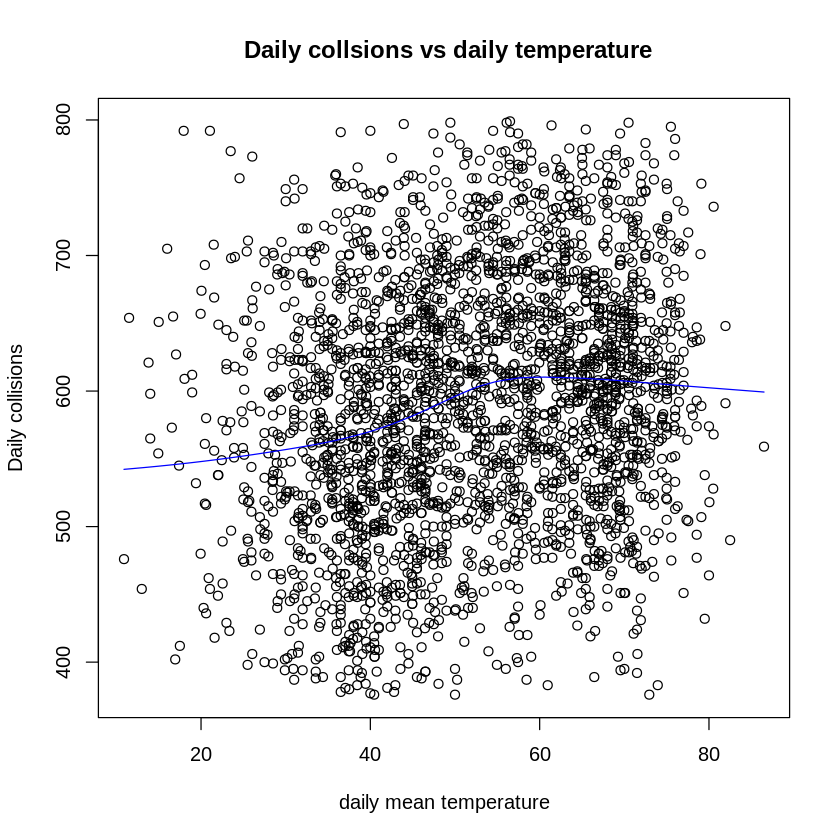

In [65]:
plot (without_the_outliers$temp_mean, without_the_outliers$NUM_COLLISIONS, main = " Daily collsions vs daily temperature", xlab = "daily mean temperature", ylab = "Daily collisions" ) 
lines(lowess(without_the_outliers$temp_mean, without_the_outliers$NUM_COLLISIONS), col = "blue")
cor(without_the_outliers$temp_mean, without_the_outliers$NUM_COLLISIONS)

As this correlation is for the data for all the years combined, a look at a couple of years individually will assertain if this low correlation is true for individual years.

For the last year in the data - 2019 :

[1] 0.2025641

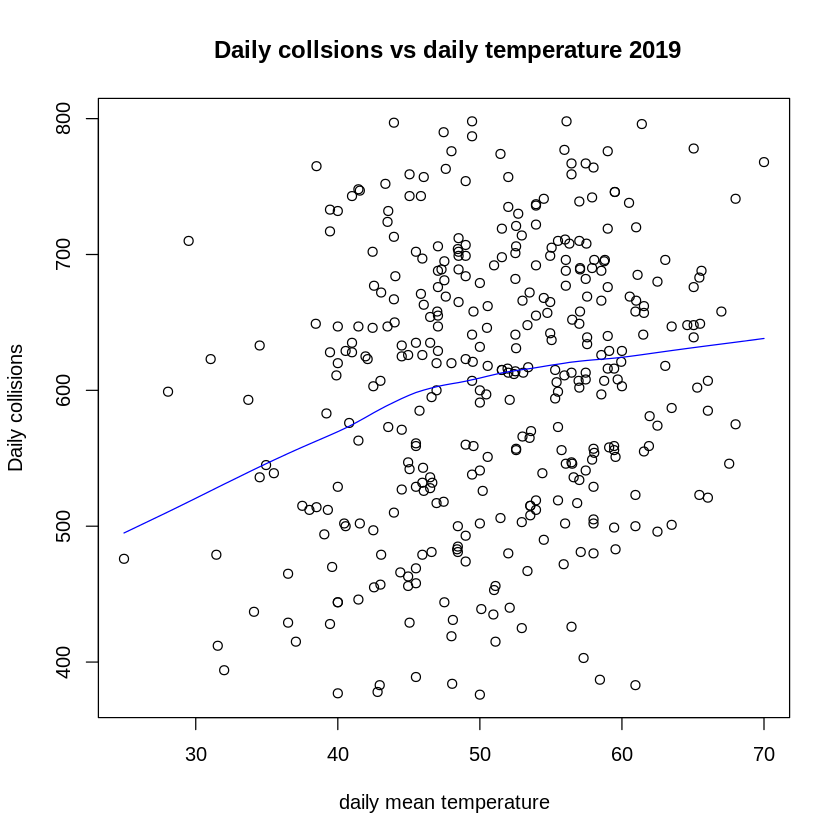

In [66]:
plot (without_the_outliers$temp_mean[2115:2480], without_the_outliers$NUM_COLLISIONS [2115:2480], main = " Daily collsions vs daily temperature 2019", xlab = "daily mean temperature", ylab = "Daily collisions" ) 
lines(lowess(without_the_outliers$temp_mean[2115:2480], without_the_outliers$NUM_COLLISIONS[2115:2480]), col = "blue")
cor(without_the_outliers$temp_mean [2115:2480], without_the_outliers$NUM_COLLISIONS[2115:2480])

A very weak correlation is evident, that of 0.2. For this first year of the data, 2013, the correlation is now a inverse corrolation, and even weaker at -0.14.


[1] -0.1432487

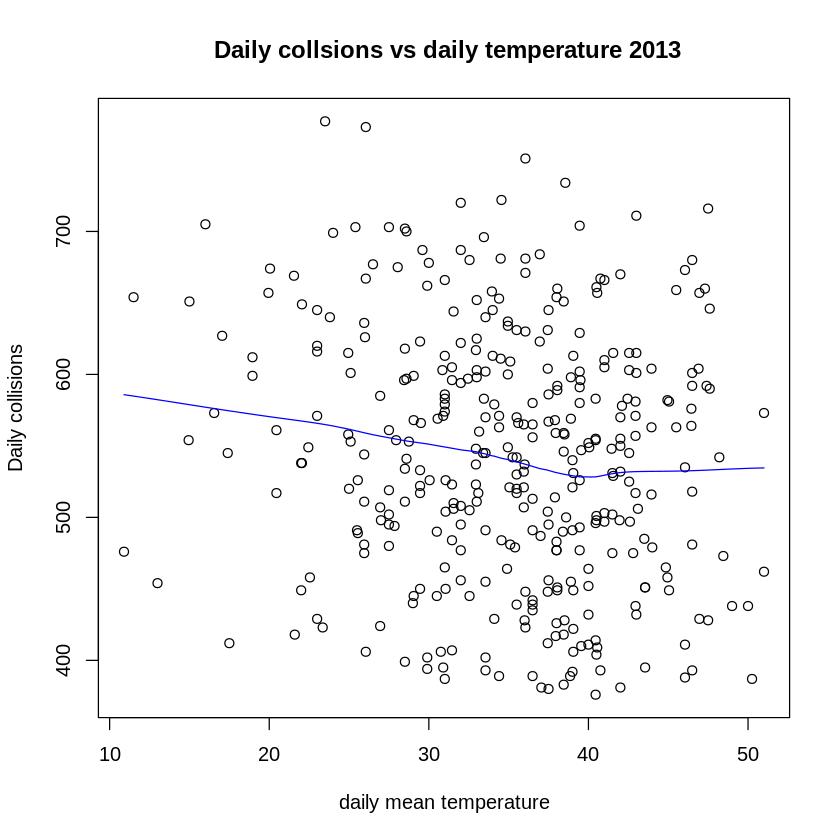

In [67]:
plot (without_the_outliers$temp_mean[1:365], without_the_outliers$NUM_COLLISIONS [1:365], main = " Daily collsions vs daily temperature 2013", xlab = "daily mean temperature", ylab = "Daily collisions" ) 
lines(lowess(without_the_outliers$temp_mean[1:365], without_the_outliers$NUM_COLLISIONS[1:365]), col = "blue")
cor(without_the_outliers$temp_mean [1:365], without_the_outliers$NUM_COLLISIONS[1:365])

In conclusion, there does not appear to be a significant relationship between the daily rate of collisions and the daily average temperature on a year by year basis, but when take over a time period of several years, a correlation, albeit a weak one, does emerge.



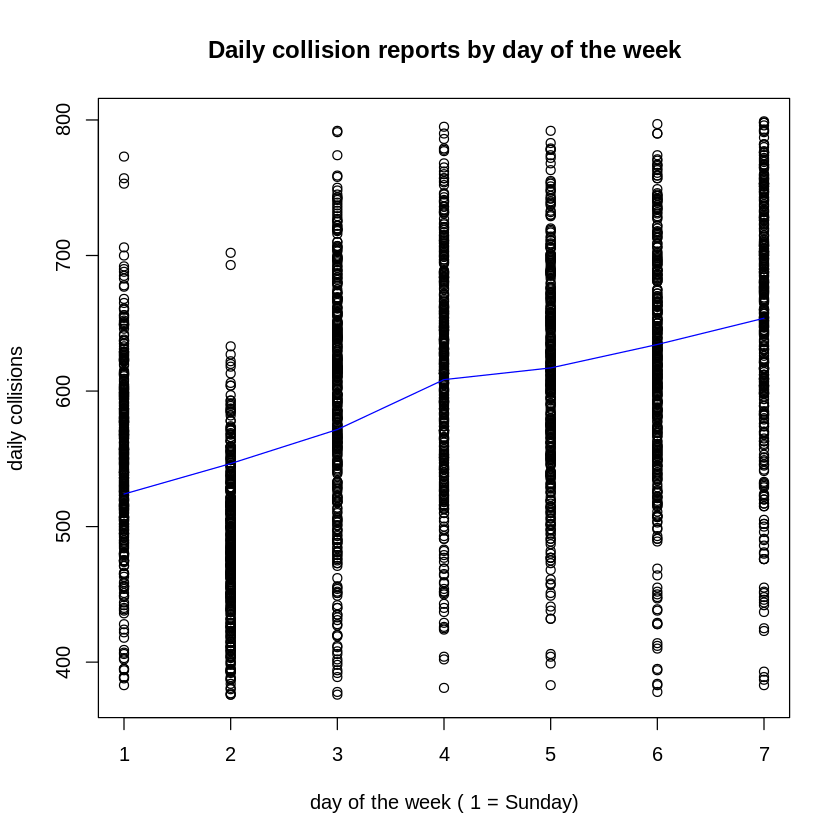

In [70]:
plot (without_the_outliers$day, without_the_outliers$NUM_COLLISIONS, main = "Daily collision reports by day of the week", xlab = "day of the week ( 1 = Sunday)" , ylab = "daily collisions")
lines(lowess(without_the_outliers$day, without_the_outliers$NUM_COLLISIONS), col = "blue")

In [71]:
cor(without_the_outliers$day, without_the_outliers$NUM_COLLISIONS)

[1] 0.4443412

A correlation of 0.44 represents a high correlation in the data, and is a strong enough relationship that suggest that the data can be used for a potential prediction model.


   

In [72]:
write.csv(collisions, file = 'collisions.csv')

**REFERENCES **

[THIS DOES NOT HAVE A REFERNCE ABOVE NOW< USE IT SOMEWHERE] https://www.rssweather.com/climate/New%20York/New%20York%20Central%20Park/


[] Present and future Köppen-Geiger climate classification maps at 1-km resolution. Hylke E. Beck, Niklaus E. Zimmermann, Tim R. McVicar, Noemi Vergopolan, Alexis Berg & Eric F. Wood. Scientific Data volume 5, Article number: 180214 (2018)


